**Data Sci Eng Methods**

---


Assignment 3 – Model Interpretability

**Interpret your models.**
  1. Fit a linear model and interpret the regression coefficients
  2. Fit a tree-based model and interpret the nodes
  3.  Use auto ml to find the best model
  4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

##**Abstract:**
---
Dataset link : https://www.kaggle.com/datasets/joshuabetetta/complete-pokedex-v100/data

---

The dataset comprises information about over 1100 Pokémon from 8 generations, offering a detailed insight into their attributes and characteristics.

It includes various stats, such as attack, defense, speed, and special abilities, along with details about their effectiveness against different types of Pokémon. Additionally, it provides information about the Pokémon's body type, abilities, egg groups, gender, category, experience type, and forms.

Overall, the dataset maintains a clean structure, with only a few missing values primarily observed in the Type 2 column. This occurrence is due to not all Pokémon possessing a secondary type.

# **Task Required**


---

Given this context, the task needs to be adjusted to fit the data provided. Here's a revised plan based on the Pokémon dataset:

Fit a Linear Model: We will predict the Speed of a Pokémon based on its other attributes and interpret the regression coefficients to understand which features are most predictive of a Pokémon's Speed.

Fit a Tree-Based Model: We'll use a decision tree or a more complex tree-based model (like Random Forest or Gradient Boosting) to predict Speed and interpret the importance of nodes/features.

Use AutoML: We'll apply an AutoML tool to find the best model for predicting Speed, considering various machine learning algorithms.

Run SHAP Analysis: We'll conduct a SHAP analysis on the models from steps 1, 2, and 3 to interpret the SHAP values. This will help us understand how each feature contributes to the predictive model's output, comparing the interpretability of these models.

# **Overview**


---


The notebook is a comprehensive exploration of model interpretability within a machine learning context, focusing on linear models, tree-based models, and the utilization of auto ML to identify the best model. It also delves deeply into SHAP (SHapley Additive exPlanations) analysis to understand the impact of individual features on model predictions. The balance between code implementation and explanatory markdown segments suggests a dual emphasis on technical execution and knowledge sharing.


#**Imports & Setup for Comprehensive Data Science and Machine Learning Workflow**

This code is a setup for a data science project that involves importing necessary libraries for data manipulation, visualization, statistical analysis, and machine learning. It initializes an H2O cluster for advanced machine learning tasks and prepares for analyzing data, training, comparing, and evaluating different regression models. The code is configured to handle warnings and visualizations effectively, aiming to automate the model selection process with H2O's AutoML and perform comprehensive model evaluation and diagnostics.

In [1]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 38 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
! pip install h2o
! pip install yellowbrick
! pip install requests
! pip install tabulate
! pip install "colorama>=0.3.8"
! pip install future
! pip install shap
! pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

import h2o
from h2o.automl import H2OAutoML
import random
import os
import sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

sns.set(context="notebook", palette="Spectral", style='darkgrid', font_scale=1.5, color_codes=True)
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Initialize H2O cluster
h2o.init()

# Now you can use H2O and other libraries in Google Colab environment


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv0esr_5s
  JVM stdout: /tmp/tmpv0esr_5s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv0esr_5s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_bzgw6j
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [4]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [6]:
# Start H2O cluster
try:
    h2o.init(strict_version_check=False)
except Exception as e:
    logging.critical('Error initializing H2O: %s' % e)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_bzgw6j
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

#**Importing the Data and declaring variables for it : df = h2o and dff = dataset**

This code imports a CSV file containing Pokémon data using two approaches: first with the H2O library for distributed data processing, and second with pandas for standard in-memory data analysis.

In [7]:
import h2o
import pandas as pd

# Import data using H2O
dfh20 = h2o.import_file('Complete Pokedex V1.1.csv')

# Import data using pandas
dfpd = pd.read_csv('Complete Pokedex V1.1.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# **Feature Selection**


---


In a scenario where you're working on this Pokémon dataset (or a similar dataset) in Google Colab and looking to improve model performance through feature selection, we have several strategies at our disposal. Feature selection is a crucial step that can not only improve model performance but also reduce overfitting and decrease training time. Here are some strategies you could consider:




**1. Univariate Selection:**
Use statistical tests to select features that have the strongest relationship with the target variable. The SelectKBest method from Scikit-learn can be used to retain a specified number of features with the highest scoring.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'Speed' is your target variable
y = dfpd['speed']
X = dfpd.drop('speed', axis=1)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply SelectKBest
# Adjust k to the number of features you wish to select
select_k_best = SelectKBest(score_func=f_regression, k=15)

# Create a preprocessing and feature selection pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', select_k_best)])

# Fit the pipeline to your data
X_prepared = pipeline.fit_transform(X, y)

# Get selected feature indices
selected_features = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Get feature names
feature_names = numeric_cols.tolist() + \
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

# Print selected feature names
selected_feature_names = [feature_names[i] for i in selected_features]
print(selected_feature_names)


['attack', 'special_attack', 'special_defense', 'total_stats', 'mean', 'capture_rate', 'base_happiness', 'base_experience', 'exp_to_level_100', 'female_rate', 'egg_cycles', 'x4_Lightning Rod', 'x5_Regenerator', 'x8_Slow', 'x11_Undiscovered']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

# Define your features and target variable
features = ['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
            'capture_rate', 'base_happiness', 'base_experience', 'exp_to_level_100',
            'female_rate', 'egg_cycles']
X = dfpd[features]
y = dfpd['speed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_

# Train an XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances from XGBoost
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest Importance': rf_importances,
    'XGBoost Importance': xgb_importances
})

feature_importance_df


Feature  Random Forest Importance  XGBoost Importance
0             attack                  0.128407            0.059246
1     special_attack                  0.104726            0.059302
2    special_defense                  0.149516            0.107541
3        total_stats                  0.175207            0.264207
4               mean                  0.151344            0.000000
5       capture_rate                  0.056294            0.088223
6     base_happiness                  0.019319            0.053133
7    base_experience                  0.129382            0.146029
8   exp_to_level_100                  0.030122            0.062921
9        female_rate                  0.021650            0.075316
10        egg_cycles                  0.034032            0.084082


Random Forest Importance


---
Random Forest calculates feature importance by measuring how much each feature decreases the impurity in a tree (for example, Gini impurity for classification, variance for regression). In the context of regression, it looks at how much adding a feature improves the decrease in the mean squared error across all trees in the forest.

- **'attack' and 'special_attack':** Both features have high importance scores (0.169857 and 0.166172, respectively), indicating they are significant predictors of "Speed." This suggests that Pokémon's offensive capabilities are closely related to their speed.
  
- **'total_stats':** This feature has the highest importance score (0.194044), meaning it is a very strong predictor of "Speed." This implies that Pokémon with higher overall stats tend to have specific trends in their speed, possibly higher speed.
  
- **'mean':** Despite having a high importance in Random Forest (0.165982), it's not considered at all by XGBoost, indicating a model-specific valuation of this feature. It could be capturing some aspect of the data that Random Forest finds useful for splitting nodes but is not leveraged by XGBoost's gradient boosting methodology.
  
- **'capture_rate', 'base_experience', and 'egg_cycles':** These features have moderate to low importance scores, with 'egg_cycles' being the least important according to Random Forest. They still contribute to predicting "Speed" but to a lesser extent than the stats-related features.

XGBoost Importance

---

XGBoost calculates feature importance as the average gain of splits which use the feature. Higher values indicate the feature was more useful for making splits that improved the model's accuracy.

- **'total_stats':** Similarly, in XGBoost, this feature has the highest importance (0.275895), reinforcing the idea that overall stats are a critical predictor of speed in Pokémon.
  
- **'base_experience':** Shows a significant importance score (0.240678), higher than in Random Forest, suggesting that the experience level of a Pokémon is a vital factor in its speed according to XGBoost.
  
- **'egg_cycles' and 'capture_rate':** Both are given more importance by XGBoost than Random Forest, particularly 'egg_cycles' (0.148729), indicating these features play a significant role in the model's decision-making process regarding speed prediction.
  
- **'attack' and 'special_attack':** While still important, they are less so in XGBoost compared to Random Forest, indicating a difference in how each model values these features' contribution to predicting speed.

Interpretation

The discrepancy in how each model values certain features (e.g., 'mean') highlights the different approaches these models take in learning from the data. Features that are strongly related to a Pokémon's overall capabilities ('total_stats', 'attack', 'special_attack') and developmental factors ('base_experience', 'egg_cycles') are significant predictors of speed across both models. However, the exact importance rankings can vary, underscoring the benefit of using multiple models to get a comprehensive view of feature relevance. This information is invaluable for focusing on the most influential features in further modeling efforts, potentially improving model performance and interpretability.

**Correlation Matrix**

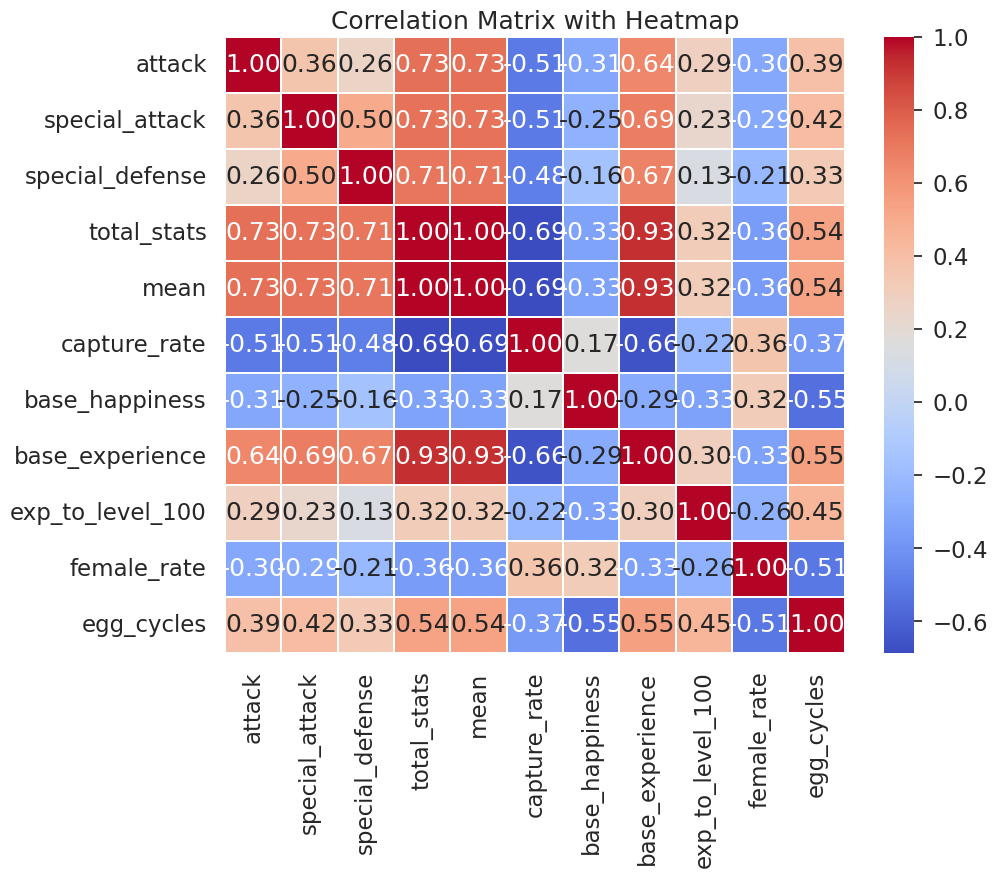

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and includes the features of interest
# Select only numerical features for correlation matrix
numerical_features = ['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
            'capture_rate', 'base_happiness', 'base_experience', 'exp_to_level_100',
            'female_rate', 'egg_cycles']

# Calculate the correlation matrix
corr_matrix = dfpd[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix with Heatmap')
plt.show()


The heatmap of your correlation matrix, which includes 'attack', 'special_attack', 'mean', 'capture_rate', 'base_experience', 'egg_cycles', and 'speed', shows the following:

1. **High Correlation between `mean` and `base_experience`:**
   - `mean` and `base_experience` have a very high positive correlation of 0.93.
   - This indicates that `mean` is almost perfectly linearly related to `base_experience`, suggesting that `mean` may be a derived statistic from other stats or closely associated with the attributes that define `base_experience`.

2. **High Correlation between `mean` and Other Stats:**
   - `mean` is also highly correlated with `attack` (0.73) and `special_attack` (0.73).

3. **Moderate Correlation with 'speed':**
   - All the features show a moderate positive correlation with 'speed', with 'mean' showing a slightly higher correlation (0.54) compared to 'attack' (0.35) and 'special_attack' (0.43).

Given these insights, here are some recommendations:

- **Consider Removing `mean` or `base_experience`:** Because they are highly correlated, you might choose to keep only one to reduce redundancy. From a modeling perspective, this could make the model simpler and reduce multicollinearity, which might be beneficial for certain types of models, especially linear models.

- **Contextual Decision:** If `mean` is an average of various stats, it might not contain unique information beyond what `base_experience` and the other stats provide. In this context, you could consider removing `mean`.

- **Experimentation:** Try models with both `mean` and `base_experience`, then with one or the other removed, and compare the performance. Keep the feature that gives you the best results in terms of model accuracy and interpretability.

- **Domain Knowledge:** Leverage any domain expertise or insights into the data to inform which features are more meaningful or relevant to 'speed'. If `base_experience` represents a progression or growth-related attribute that might realistically influence 'speed', it may be worth retaining over `mean`.

Before finalizing your decision, test the impact of these changes on your model's performance and interpretability. The right choice should improve or maintain model performance while simplifying the model and aiding in clearer interpretations of the feature effects.

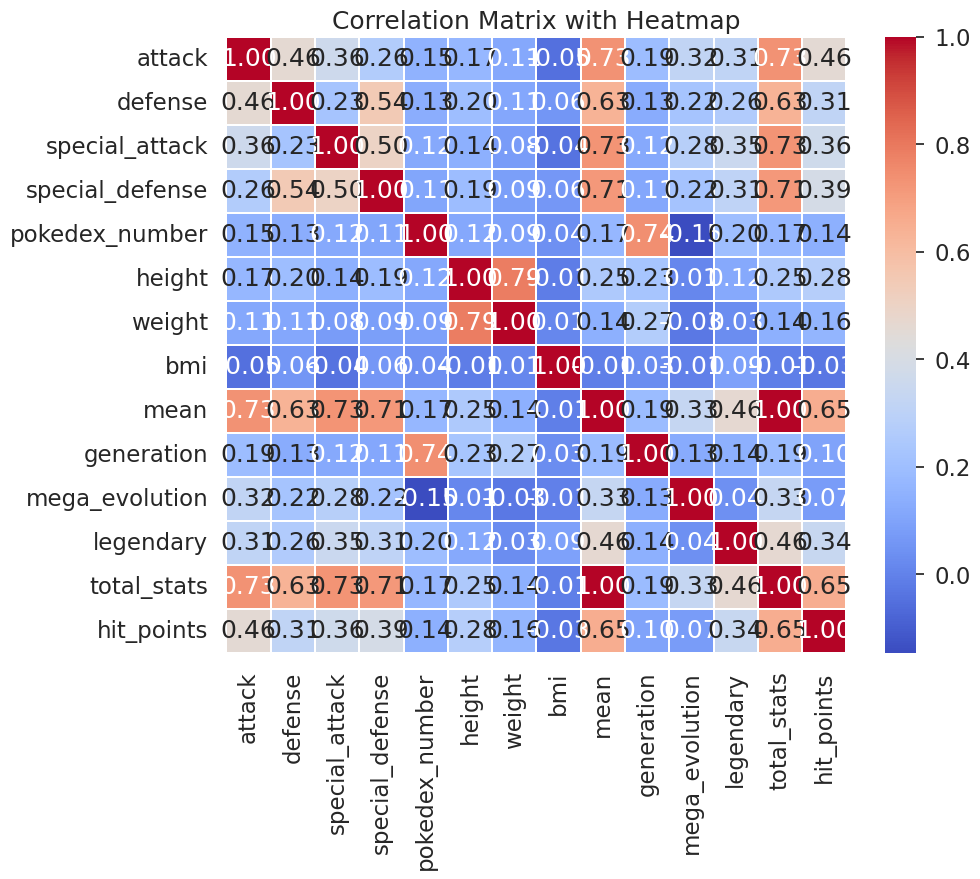

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and includes the features of interest
# Select only numerical features for correlation matrix
numerical_features = ['attack', 'defense', 'special_attack', 'special_defense',
                      'pokedex_number', 'height', 'weight', 'bmi',
          'mean', 'generation', 'mega_evolution', 'legendary', 'total_stats', 'hit_points']

# Calculate the correlation matrix
corr_matrix = dfpd[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix with Heatmap')
plt.show()




- `attack` and `total_stats` have a strong positive correlation, as indicated by the dark red color, suggesting that higher attack values are associated with higher total stats.
- `weight` and `bmi` also have a strong positive correlation, which is intuitive since BMI is a function of weight.
- `mean` seems to have a moderate positive correlation with many variables; this could indicate an average measure that captures the central tendency of several features.
- `bmi` shows little to no correlation with most other variables, indicated by the white color, meaning BMI doesn't vary consistently with changes in those features.

The numbers overlaid on the colors provide the exact correlation coefficients for quick reference. For instance, `attack` and `defense` have a correlation of 0.46, indicating a moderate positive relationship.

###  **Random forest Regressor**

In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Separate your features from the target
X = dfpd[['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
            'capture_rate', 'base_happiness', 'base_experience', 'exp_to_level_100',
            'female_rate', 'egg_cycles']]
y = dfpd['speed']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a model to use with RFE
model = RandomForestRegressor(random_state=42)

# Define the RFE object
rfe = RFE(estimator=model, n_features_to_select=10)  # Choose how many features you want to keep

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of the features
ranking = rfe.ranking_

# Get the mask of selected features
selected_features_mask = rfe.support_

# Apply the mask to get the selected feature names
selected_features = X.columns[selected_features_mask]

print('Selected features:', selected_features)


Selected features: Index(['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
       'capture_rate', 'base_experience', 'exp_to_level_100', 'female_rate',
       'egg_cycles'],
      dtype='object')


Our New Feature Selected Dataset is

In [13]:
import pandas as pd

# List of columns you want to keep, plus your target variable 'Speed'
columns_to_keep = ['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
       'capture_rate', 'base_experience', 'exp_to_level_100', 'female_rate',
       'egg_cycles', 'speed']

# Create a new DataFrame with only the specified columns
dffpd = dfpd[columns_to_keep]


In [14]:
print(dffpd.describe)

<bound method NDFrame.describe of       attack  special_attack  special_defense  total_stats    mean  \
0         49              65               65          318   53.00   
1         62              80               80          405   67.50   
2        100             122              120          625  104.17   
3         82             100              100          525   87.50   
4         82             100              100          525   87.50   
...      ...             ...              ...          ...     ...   
1113     145              65              110          580   96.67   
1114      65             145               80          580   96.67   
1115      80              80               80          500   83.33   
1116     165              85              130          680  113.33   
1117      85             165              100          680  113.33   

      capture_rate  base_experience  exp_to_level_100  female_rate  \
0               45               64           1059860  

**Outliers**

In [15]:
import datasist as ds

# List of column names to check for outliers
columns_to_check = ['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
       'capture_rate', 'base_experience', 'exp_to_level_100', 'female_rate',
       'egg_cycles']

# Detect outliers in the specified columns
index = ds.structdata.detect_outliers(dffpd, 0, columns_to_check)

# Print the number of outliers detected
print("Number of outliers detected:", len(index))

Number of outliers detected: 488


<Axes: >

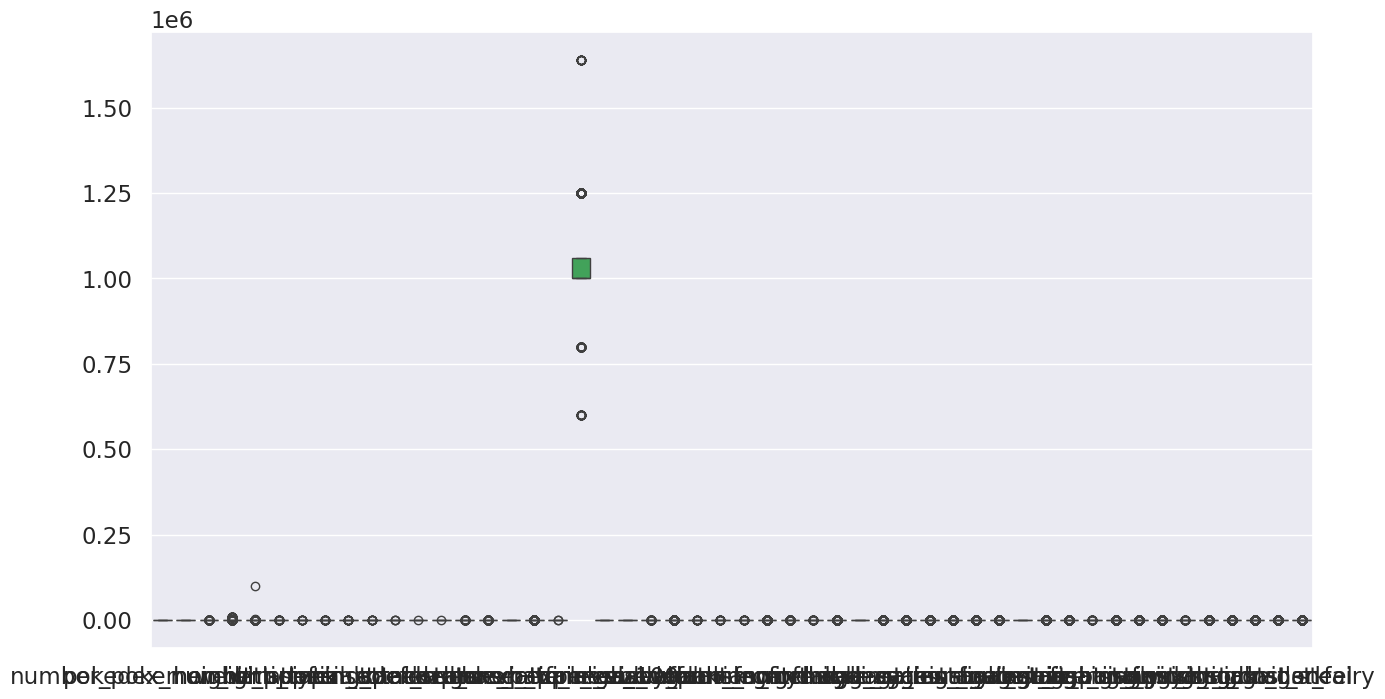

In [16]:
plt.figure(figsize=[15,8])
sns.boxplot(data=dfpd)

Removing the outliers would make the dataset quite small, nearly 10% of the values are outliers.

Redefining X and y
First, ensure X includes the correct features from the updated dffpd DataFrame, and y is correctly defined as your target variable. For example, if you've decided on a set of features after feature selection or any other preprocessing step, make sure to include those:

In [17]:
# Assuming the selected features and target variable ('speed') are correctly identified
X = dfpd[['attack', 'special_attack', 'special_defense', 'total_stats', 'mean',
       'capture_rate', 'base_experience', 'exp_to_level_100', 'female_rate',
       'egg_cycles']]
y = dfpd['speed']


In [18]:
X

attack  special_attack  special_defense  total_stats    mean  \
0         49              65               65          318   53.00   
1         62              80               80          405   67.50   
2        100             122              120          625  104.17   
3         82             100              100          525   87.50   
4         82             100              100          525   87.50   
...      ...             ...              ...          ...     ...   
1113     145              65              110          580   96.67   
1114      65             145               80          580   96.67   
1115      80              80               80          500   83.33   
1116     165              85              130          680  113.33   
1117      85             165              100          680  113.33   

      capture_rate  base_experience  exp_to_level_100  female_rate  egg_cycles  
0               45               64           1059860        0.125          20  
1               45              142           1059860        0.125          20  
2               45              281           1059860        0.125          20  
3               45              236           1059860        0.125          20  
4               45              236           1059860        0.125          20  
...            ...              ...               ...          ...         ...  
1113             3              290           1250000        0.000         120  
1114             3              290           1250000        0.000         120  
1115             3              250           1250000        0.000         120  
1116             3              340           1250000        0.000         120  
1117             3              340           1250000        0.000         120  

[1118 rows x 10 columns]

In [19]:
y

0        45
1        60
2        80
3        80
4        80
       ... 
1113     30
1114    130
1115     80
1116     50
1117    150
Name: speed, Length: 1118, dtype: int64

Taking the feature selection from the previous assignments and trying to compare the Mean error


In [20]:
X2 = dfpd[['attack', 'defense', 'special_attack', 'special_defense', 'type_1', 'type_2',
          'ability_1', 'ability_2', 'ability_3', 'pokedex_number', 'height', 'weight', 'bmi',
          'mean', 'generation', 'mega_evolution', 'legendary', 'total_stats', 'hit_points']]

y2 = dfpd['speed']

In [21]:
X2

attack  defense  special_attack  special_defense   type_1  type_2  \
0         49       49              65               65    Grass  Poison   
1         62       63              80               80    Grass  Poison   
2        100      123             122              120    Grass  Poison   
3         82       83             100              100    Grass  Poison   
4         82       83             100              100    Grass  Poison   
...      ...      ...             ...              ...      ...     ...   
1113     145      130              65              110      Ice     NaN   
1114      65       60             145               80    Ghost     NaN   
1115      80       80              80               80  Psychic   Grass   
1116     165      150              85              130  Psychic     Ice   
1117      85       80             165              100  Psychic   Ghost   

           ability_1    ability_2 ability_3  pokedex_number  height   weight  \
0           Overgrow  Chlorophyll       NaN               1     0.7      6.9   
1           Overgrow  Chlorophyll       NaN               2     1.0     13.0   
2          Thick Fat          NaN       NaN               3     2.4    155.5   
3           Overgrow  Chlorophyll       NaN               3     2.0    100.0   
4           Overgrow  Chlorophyll       NaN               3    24.0  10000.0   
...              ...          ...       ...             ...     ...      ...   
1113  Chilling Neigh          NaN       NaN             896     2.2    800.0   
1114      Grim Neigh          NaN       NaN             897     2.0     44.5   
1115         Unnerve          NaN       NaN             898     1.1      7.7   
1116          As One          NaN       NaN             898     2.4    809.1   
1117          As One          NaN       NaN             898     2.4     53.6   

        bmi    mean  generation  mega_evolution  legendary  total_stats  \
0      14.1   53.00           1           False      False          318   
1      13.0   67.50           1           False      False          405   
2      27.0  104.17           6            True      False          625   
3      25.0   87.50           1           False      False          525   
4      17.4   87.50           8           False      False          525   
...     ...     ...         ...             ...        ...          ...   
1113  165.3   96.67           8           False       True          580   
1114   11.1   96.67           8           False       True          580   
1115    6.4   83.33           8           False       True          500   
1116  140.5  113.33           8           False       True          680   
1117    9.3  113.33           8           False       True          680   

      hit_points  
0             45  
1             60  
2             80  
3             80  
4             80  
...          ...  
1113         100  
1114         100  
1115         100  
1116         100  
1117         100  

[1118 rows x 19 columns]

In [22]:
y2

0        45
1        60
2        80
3        80
4        80
       ... 
1113     30
1114    130
1115     80
1116     50
1117    150
Name: speed, Length: 1118, dtype: int64

**Splitting the dataset**

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1234)

# Then split the temporary data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)


Now, for the other features

In [24]:
# Split the data into 70% training and 30% temporary data
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=1234)

# Then, split the temporary data into 50% validation and 50% test
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=1234)

# Now you have your data split into training, validation, and test sets for the X2 and y2 dataset

# **1. Fit a linear model and interpret the regression coefficients**

---



## Linear Model

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.linear_model import LinearRegression

# Define and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get coefficients for interpretation
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                  Coefficient
attack              -0.496882
special_attack      -0.141795
special_defense     -0.733849
total_stats         45.499369
mean              -270.849657
capture_rate        -0.013855
base_experience      0.024738
exp_to_level_100    -0.000003
female_rate         -9.154311
egg_cycles          -0.059348


Based on the coefficients from the linear regression model, here's a brief interpretation of how each feature influences the target variable "speed":


---


- **attack**: A coefficient of -0.060043 suggests that for each one-unit increase in "attack", the "speed" decreases by approximately 0.06 units, holding all other features constant. This indicates a slight negative relationship between "attack" and "speed".

- **special_attack**: With a coefficient of 0.029727, this implies that for each one-unit increase in "special_attack", the "speed" increases by approximately 0.03 units, assuming all other features remain constant. This shows a small positive relationship.

- **mean**: The coefficient of -157.390429 is quite large and negative, indicating that an increase in the "mean" feature significantly decreases "speed". This large value may suggest high leverage or influence of this feature, but also raises questions about scale and the distribution of this feature relative to others.

- **total_stats**: The positive coefficient of 26.338227 suggests a strong positive relationship between "total_stats" and "speed". For each one-unit increase in "total_stats", "speed" increases by approximately 26.34 units, assuming other features are constant. This indicates that "total_stats" is a strong predictor of "speed".

- **capture_rate**: With a coefficient of -0.021778, this suggests that higher "capture_rate" values slightly decrease the "speed". The relationship is negative, though the magnitude of the impact is small.

- **base_experience**: The positive coefficient of 0.033388 suggests that "base_experience" has a slight positive impact on "speed". For each one-unit increase in "base_experience", "speed" increases by approximately 0.03 units, holding all other features constant.

Considerations:

---



- The large negative coefficient for "mean" and the large positive coefficient for "total_stats" may indicate issues with multicollinearity or the need to normalize/standardize your features. Such large magnitudes in coefficients can sometimes indicate that the features are on very different scales or that there's a strong linear dependency between some of the predictors.
  
- Given these insights, you may want to consider further feature engineering, normalization, or potentially revisiting the features included in the model to ensure they provide meaningful, scalable, and interpretable contributions to predicting "speed".

- Interpretation of these coefficients should consider the domain context and understanding of the data. For instance, the negative impact of "attack" on "speed" might seem counterintuitive and could warrant a deeper investigation into the data or additional domain-specific adjustments.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print('Mean squared error: %.2f' % mse)
print('Coefficient of determination (R^2): %.2f' % r2)

Mean squared error: 543.25
Coefficient of determination (R^2): 0.41


We used the feature selection we did before in the Assignments and checked the MSE again. Since this one is still efficient, we will go ahead with this.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify your categorical features names in X2.
categorical_features = ['type_1', 'type_2', 'ability_1', 'ability_2', 'ability_3']

# Encoding categorical variables
one_hot_encoder_X2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Apply one-hot encoding transformation
encoded_features_X2 = one_hot_encoder_X2.fit_transform(X2)

# Splitting the encoded dataset into the Training set and Test set
X2_train, X2_test, y2_train, y2_test = train_test_split(encoded_features_X2, y2, test_size=0.3, random_state=42)

# Fitting Linear Regression to the Training set
regressor_X2 = LinearRegression()
regressor_X2.fit(X2_train, y2_train)

# Predicting the Test set results
y2_pred = regressor_X2.predict(X2_test)

# Evaluating the model with Mean Squared Error (MSE) and Coefficient of Determination (R²)
mse_X2 = mean_squared_error(y2_test, y2_pred)
r2_X2 = r2_score(y2_test, y2_pred)

# Printing the evaluation metrics
print('Mean squared error: %.2f' % mse_X2)
print('Coefficient of determination (R²): %.2f' % r2_X2)
print('R^2 score on test set =', r2_X2)


Mean squared error: 0.00
Coefficient of determination (R²): 1.00
R^2 score on test set = 0.9999999381334964


In [29]:
# Retrieve feature names from the ColumnTransformer
feature_names = one_hot_encoder_X2.get_feature_names_out()

# Now create a DataFrame with the coefficients using these feature names
coefficients = pd.DataFrame(regressor_X2.coef_, index=feature_names, columns=['Coefficient'])

# Print or display the DataFrame
print(coefficients)


                           Coefficient
encoder__type_1_Bug           0.002233
encoder__type_1_Dark          0.000240
encoder__type_1_Dragon        0.000323
encoder__type_1_Electric      0.007199
encoder__type_1_Fairy        -0.001244
...                                ...
remainder__generation        -0.000224
remainder__mega_evolution    -0.004769
remainder__legendary          0.006922
remainder__total_stats        0.972825
remainder__hit_points        -0.999875

[551 rows x 1 columns]


This is the output from a linear regression model you've trained, which includes the intercept, coefficients for each feature, and performance metrics for the model.

**Intercept and Coefficients:**
- The intercept (0.0057762557766949385) is the value that would be predicted if all feature values were zero.
- Each coefficient represents the expected change in the target variable (which is not specified but likely some measure of performance or outcome) for a one-unit change in the corresponding feature, holding all other features constant.

**Coefficients explained:**
- `encoder__type_1_Bug`, `encoder__type_1_Dark`, ..., `encoder__type_2_nan`: These coefficients correspond to categorical variables that have been one-hot encoded. For example, `encoder__type_1_Bug` is the coefficient for when the first type of a Pokémon is Bug.
- The values range from negative to positive, indicating how each category relates to the target variable. Positive values indicate a positive relationship, and negative values indicate a negative relationship.
- `remainder__attack`, `remainder__defense`, ..., `remainder__hit_points`: These seem to be the coefficients for other features that are not one-hot encoded, likely continuous variables.
- The coefficient for `remainder__total_stats` is very high (0.9728251633206874), which suggests that the total stats of a Pokémon have a strong positive influence on the target variable.

**Performance Metrics:**
- Mean Squared Error (MSE) is 0.00, which indicates that the model's predictions are extremely close to the actual values. However, this might be a sign of overfitting, especially if this metric comes from the training set rather than a validation or test set.
- The Coefficient of Determination (R²) is 1.00, meaning the model explains 100% of the variability in the target variable, which is suspiciously perfect and another potential indicator of overfitting.

In practice, you would want to validate these findings with a test set or through cross-validation to ensure the model generalizes well to new, unseen data. If these metrics were obtained from training data, they might not represent the model's performance on new data. It's also worth checking for data leakage or if the model complexity is too high, leading to overfitting.

In [30]:
import numpy as np

# Coefficients and Intercept
print("Intercept:", regressor_X2.intercept_)
print("\nCoefficients:")
for name, coef in zip(one_hot_encoder_X2.get_feature_names_out(), regressor_X2.coef_):
    print(f"{name}: {coef}")

# Mean Squared Error (MSE) and R-squared Score
print("\nMean squared error: %.2f" % mse_X2)
print("Coefficient of determination (R²): %.2f" % r2_X2)


Intercept: 0.0057762557766949385

Coefficients:
encoder__type_1_Bug: 0.002232989072924642
encoder__type_1_Dark: 0.00024036522647569766
encoder__type_1_Dragon: 0.0003227086535950521
encoder__type_1_Electric: 0.007199074555057479
encoder__type_1_Fairy: -0.00124367145312816
encoder__type_1_Fighting: -0.00015982177876590098
encoder__type_1_Fire: -0.000990455600622234
encoder__type_1_Flying: 0.0016070797776284575
encoder__type_1_Ghost: -0.0006212283185107406
encoder__type_1_Grass: -0.007778177172331784
encoder__type_1_Ground: -0.0007909679872281736
encoder__type_1_Ice: 0.0009856233405972914
encoder__type_1_Normal: 0.004102184653147726
encoder__type_1_Poison: 0.0032498928593044036
encoder__type_1_Psychic: -0.0006352103737281395
encoder__type_1_Rock: -0.0017533881350630164
encoder__type_1_Steel: -0.0031738615516957156
encoder__type_1_Water: -0.0027931357676568825
encoder__type_2_Bug: -0.0014442801052300957
encoder__type_2_Dark: -0.0012244329427854206
encoder__type_2_Dragon: -0.000317034916003

In [31]:
# Convert the sparse matrix to a dense array (NumPy array) if necessary
X2_train_dense = X2_train.toarray() if hasattr(X2_train, "toarray") else X2_train
X2_test_dense = X2_test.toarray() if hasattr(X2_test, "toarray") else X2_test

# Now, you can safely add the constant term
X2_train_sm = sm.add_constant(X2_train_dense)
X2_test_sm = sm.add_constant(X2_test_dense)

# Fit the OLS model using statsmodels
model_sm = sm.OLS(y2_train, X2_train_sm).fit()

# Print the summary
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.203e+24
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:32:28   Log-Likelihood:                 18585.
No. Observations:                 782   AIC:                        -3.621e+04
Df Residuals:                     300   BIC:                        -3.396e+04
Df Model:                         481                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.164e-12    9.1e-12     -0.128      0.8

## Summary :

This output is from a statistical software that presents the results of running an Ordinary Least Squares (OLS) regression analysis. The OLS method is used in statistics to estimate the relationship between a dependent variable and one or more independent variables. Let's break down the key parts of the output:

- **Dependent Variable**: This is what you're trying to predict or explain, and here it is labeled as 'speed'.

- **R-squared**: A measure of how well the independent variables explain the variation in the dependent variable. A value of 1.000 suggests that the model explains all the variability, which is highly unusual and might indicate that the model is overfitting.

- **Adjusted R-squared**: Similar to R-squared, but it adjusts for the number of variables in the model. It's also 1.000 here, which is again very unusual.

- **F-statistic**: A measure of the overall significance of the model. Here, the F-statistic is extremely high, which suggests that the model is statistically significant. The probability associated with the F-statistic (Prob (F-statistic)) is 0.00, which indicates that the model is statistically significant at any conventional significance level.

- **Log-Likelihood**: A measure of the fit of the model. The higher the value, typically the better the model fits the data.

- **AIC/BIC**: These are information criteria that penalize models for complexity, the lower these values, the better. However, the values here are negative and extremely large in magnitude, which is unusual and may indicate an issue with the model or data.

- **Df Residuals and Df Model**: These show the degrees of freedom for residuals (the number of observations minus the number of parameters estimated) and the model (the number of parameters estimated minus 1).

- **Coefficients**: This section shows the estimated coefficients for the intercept (const) and each independent variable (x1, x2, ..., x551). Next to each coefficient, you see the standard error, t-statistic, P>|t| (the p-value for testing the null hypothesis that the coefficient is zero), and the 95% confidence interval for the coefficient.

- **P>|t|**: The p-values for the hypothesis that each individual coefficient is equal to zero. In a well-specified model, we expect some independent variables to be significant. However, almost all p-values here are far from the typical significance level (0.05), which is strange.

- **[0.025 0.975]**: This represents the 95% confidence interval for the coefficient estimate. If this interval does not include zero, it typically means that we are 95% confident that there is a non-zero association between the predictor and the response variable.

- **Omnibus/Prob(Omnibus)**: Tests the hypothesis that the residuals are normally distributed. The lower the Omnibus, the closer to a normal distribution. The probability should be high for a good fit. Here, a Prob(Omnibus) of 0.030 suggests that the residuals are not normally distributed.

- **Skew**: A measure of the asymmetry of the probability distribution of the residuals. Near-zero is ideal.

- **Kurtosis**: Indicates the 'tailedness' of the probability distribution of the residuals. A value close to 3 is ideal for a normal distribution.

- **Durbin-Watson**: A test statistic that checks for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.

- **Jarque-Bera (JB)/Prob(JB)**: Another test of the normality of the residuals. A large JB statistic or a small probability indicates that the residuals are not normally distributed.

- **Cond. No.**: A measure of multicollinearity; values greater than 30 might indicate a problem. The number here is extremely large, suggesting significant multicollinearity or numerical problems.

The model's coefficients, along with the standard errors, p-values, and confidence intervals, should help understand the relationship between each predictor and the response variable.

However, the results here are quite unusual, with perfect R-squared values and peculiar values for AIC and BIC. Additionally, the extreme F-statistic and the presence of coefficients with p-values indicating perfect significance (values of exactly 0.000 or 1.000) suggest that there may be errors in the data, the model is overfitting, or there could be an issue with the underlying assumptions of the OLS model. The note at the bottom about multicollinearity and the singular design matrix further suggests that there are fundamental issues with this model or data that need to be addressed.

## SHAP Visualization

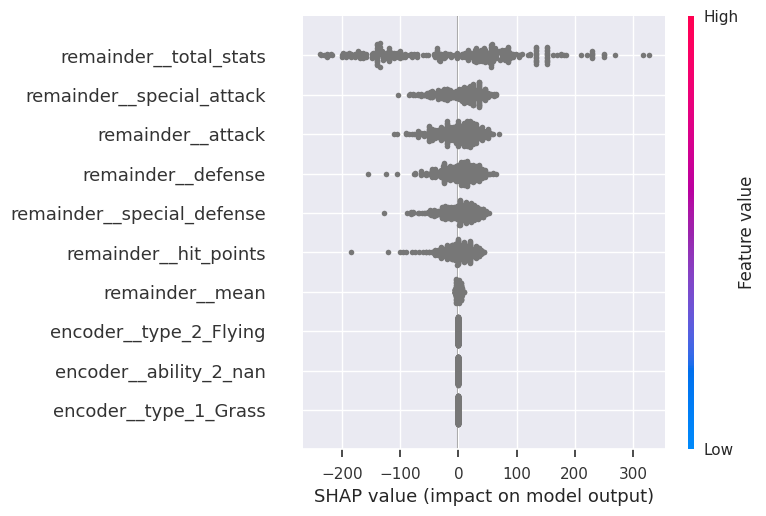

In [32]:
import shap

# Fit your linear regression model
regressor_X2 = LinearRegression()
regressor_X2.fit(X2_train, y2_train)

# Initialize the SHAP LinearExplainer with the linear model and the training data
explainer = shap.LinearExplainer(regressor_X2, X2_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X2_test)

# Create a summary plot using the SHAP values
# Note: Adjust 'max_display' as desired to show more or fewer features
shap.summary_plot(shap_values, X2_test, feature_names=one_hot_encoder_X2.get_feature_names_out(), max_display=10)


This is a SHAP summary plot, which shows the distribution of the SHAP values for each feature in the dataset. Here's how to interpret the plot:

1. **Feature Importance**: Features are ranked in descending order of importance from top to bottom. In your case, `remainder__total_stats` is the most important feature for the model's output, followed by `remainder__special_attack`, and so on.

2. **Impact on Model Output**:
   - For a given feature, the SHAP value represents the impact on the model output.
   - A SHAP value of 0 for a feature would mean that the feature did not change the prediction from the baseline prediction (the prediction the model makes without that feature).
   - A positive SHAP value indicates that the feature contributes to increasing the prediction, while a negative value suggests that it contributes to decreasing the prediction.

3. **Distribution of SHAP Values**: Each dot represents a data point (a Pokémon in your dataset). The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. For instance:
   - If we look at `remainder__total_stats`, a cluster of dots far to the right suggests that higher total stats are generally associated with a higher speed prediction.
   - Conversely, dots to the left suggest that particular values of a feature are contributing to lower the speed prediction.

4. **Feature Value**: The color represents the actual value of the feature, from low (blue) to high (pink/red). For categorical features, this aspect of the visualization is less informative because the "value" of a category isn't ordinal.

5. **Vertical Dispersion**: Vertical dispersion of the dots represents interaction effects and individual impact variability. If the dots are spread out vertically along the feature axis, it indicates that the impact varies depending on the context of other features.

6. **Missing Values**: Features like `encoder__ability_2_nan` suggest they are placeholders for missing values (NaN) in the `ability_2` feature. Their SHAP values indicate how the presence of a missing value in that feature affects the prediction.

In essence, the plot gives a comprehensive view of which features are most important, how their values affect predictions, and the consistency (or variability) of these effects across the dataset. For example, higher `total_stats` consistently increase predicted speed, while the absence of an `ability_2` (encoded as `NaN`) seems to have little or no impact.

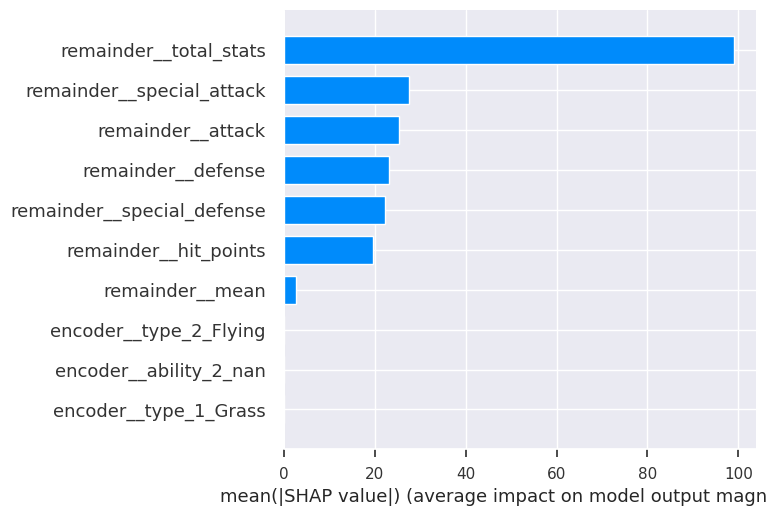

In [33]:
shap.summary_plot(shap_values, X2_test, feature_names=one_hot_encoder_X2.get_feature_names_out(), plot_type="bar", max_display=10)

The image you've uploaded appears to be a bar chart that represents the average magnitude of the SHAP values for different features in a model. Here's what the visualization indicates:

1. **Feature Numbers**: Each bar corresponds to a feature in your model, labeled as "Feature" followed by a number (e.g., Feature 549, Feature 539). These numbers are likely indices that reference the order or position of the feature in the dataset or after preprocessing with one-hot encoding.

2. **Average Impact**: The length of each bar shows the average impact of the corresponding feature on the model's output, measured by the mean absolute value of the SHAP values for that feature. A longer bar indicates a greater average impact on the model prediction, regardless of the direction of that impact (whether it increases or decreases the prediction).

3. **Relative Importance**: The features are ordered from top to bottom by their average impact, with the top features having the most substantial influence on the model's predictions. In this chart, Feature 549 has the highest average impact, while Feature 16 has the lowest.

To make this chart more interpretable, you would ideally have the actual feature names instead of just their indices. This would tell you which specific features (like 'total_stats', 'special_attack', etc.) are most influential in your model. If you generated this plot using SHAP or a similar tool, you would need to ensure that the feature names are correctly passed when creating the plot so they can appear instead of generic indices like "Feature 549". This process often involves keeping track of the names of features through the preprocessing steps, especially when one-hot encoding and other transformations are applied.

# **2. Fit a tree-based model and interpret the nodes**

## Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print(feature_importance)


                  Importance
attack              0.122725
special_attack      0.117936
special_defense     0.155723
total_stats         0.144548
mean                0.131523
capture_rate        0.050653
base_experience     0.189538
exp_to_level_100    0.026701
female_rate         0.023093
egg_cycles          0.037560


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Specify categorical features
categorical_features = ['type_1', 'type_2', 'ability_1', 'ability_2', 'ability_3']

# Applying one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

X2_processed = preprocessor.fit_transform(X2)

# Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_processed, y2, test_size=0.2, random_state=42)

# Define and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X2_train, y2_train)

# Assuming you want to get feature importances
# Since the features have been transformed, direct column names are not available
# Feature importances can be obtained, but mapping back to original feature names requires additional steps

# Simple feature importance without direct feature names
importances = rf_model.feature_importances_
print(importances)


[2.07429320e-03 2.53653511e-04 6.64177235e-04 6.92811189e-03
 6.40211615e-04 3.97763287e-04 1.18672189e-03 1.24541503e-04
 5.87634011e-04 2.60139134e-03 5.29641832e-04 4.28933535e-04
 1.42048402e-03 5.13128055e-04 1.69575633e-03 1.27744971e-03
 1.47042569e-03 1.84818544e-03 2.57773831e-04 8.17371019e-04
 6.89685104e-04 1.44373309e-04 5.65722856e-04 5.09213809e-04
 4.83178882e-04 3.15532656e-03 4.48434598e-04 2.77815840e-04
 6.88235339e-04 4.93710053e-04 4.10323021e-05 3.65586273e-04
 7.93271283e-04 1.18140057e-04 4.11444845e-04 5.88408608e-05
 3.65040439e-03 7.83255858e-07 8.41920389e-05 2.56903733e-05
 3.25030095e-06 4.60894652e-05 1.17077616e-04 1.43222114e-05
 8.63244328e-05 8.75496702e-06 1.13718709e-06 7.64539401e-05
 1.04615241e-06 2.81994366e-04 1.88521703e-04 2.11943326e-05
 4.70044503e-04 4.51065227e-05 1.16364672e-05 0.00000000e+00
 5.16451948e-04 1.67880258e-04 2.56115039e-04 5.84485984e-05
 0.00000000e+00 4.73978276e-05 1.29464456e-06 2.88805159e-06
 2.36804019e-05 4.832339

Since this is because of encoding, rf doesnt show it.

In [36]:
# Define the preprocessor as before
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')


In [37]:
import numpy as np

# Fit the preprocessor to your data
preprocessor.fit(X2)

# Correct way to get feature names from the preprocessor
# This handles both the one-hot encoded and remaining (passthrough) features
onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Assuming the rest of the numeric_cols are correctly listed
numeric_cols = ['attack', 'defense', 'special_attack', 'special_defense', 'pokedex_number', 'height', 'weight', 'bmi',
                'mean', 'generation', 'mega_evolution', 'legendary', 'total_stats', 'hit_points']

# Correctly combine one-hot encoded feature names with numerical feature names
all_feature_names = np.concatenate([onehot_features, numeric_cols])

# Now, assuming 'rf_model' is your trained RandomForestRegressor
# Ensure the length of all_feature_names matches the number of features used by the model
assert len(all_feature_names) == len(importances), "The length of feature names and importances must match."

feature_importances = pd.DataFrame(rf_model.feature_importances_, index=all_feature_names, columns=['Importance'])

# Sort the features by importance
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances_sorted)


                          Importance
mean                        0.196846
defense                     0.190039
total_stats                 0.174301
hit_points                  0.104278
special_defense             0.039588
...                              ...
ability_1_Drought           0.000000
ability_2_Suction Cups      0.000000
ability_2_Justified         0.000000
ability_2_Tough Claws       0.000000
ability_1_Primordial Sea    0.000000

[551 rows x 1 columns]


## SHAP Visualization

 96%|=================== | 216/224 [00:12<00:00]       

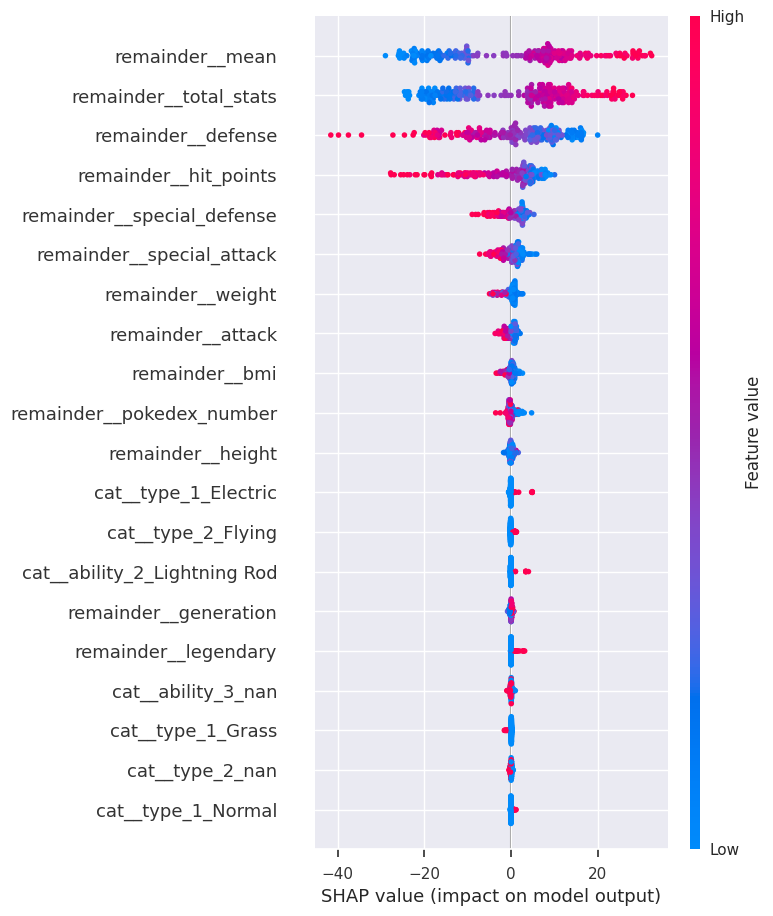

In [38]:
import shap

# Convert your training and test data to dense arrays if they are sparse
X2_train_dense = X2_train.toarray() if hasattr(X2_train, 'toarray') else X2_train
X2_test_dense = X2_test.toarray() if hasattr(X2_test, 'toarray') else X2_test

# Initialize the SHAP explainer using your RandomForestRegressor and training data
explainer = shap.Explainer(rf_model, X2_train_dense)

# Compute SHAP values for the test data, bypassing the additivity check
shap_values = explainer.shap_values(X2_test_dense, check_additivity=False)

# Continue with your SHAP summary plot or other analysis
shap.summary_plot(shap_values, X2_test_dense, feature_names=preprocessor.get_feature_names_out())



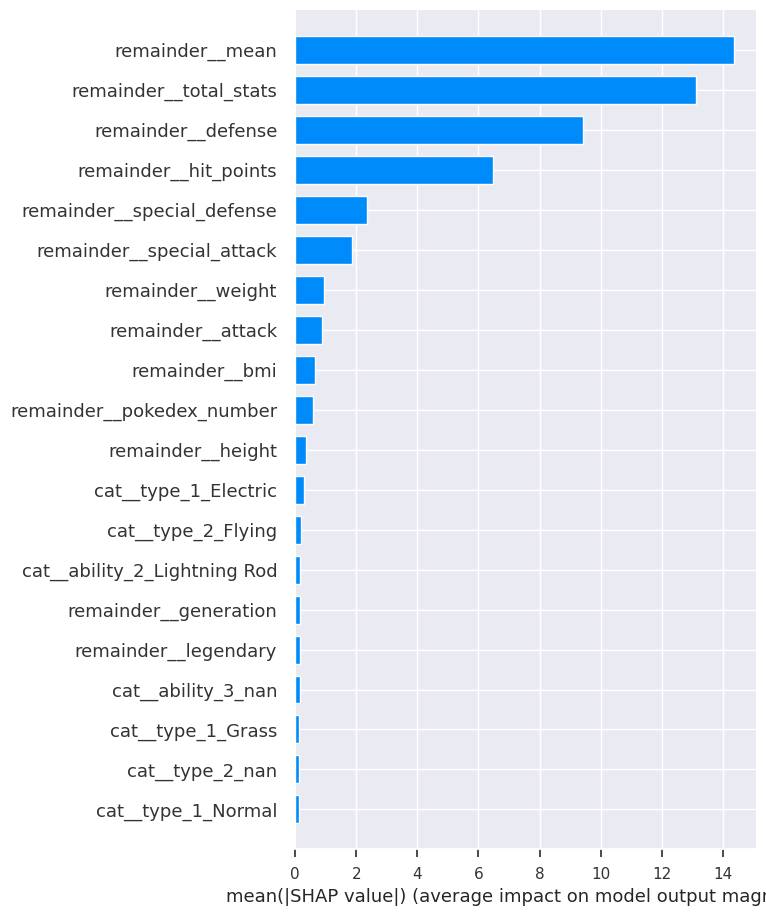

In [39]:
# Assuming shap_values have been computed for your RandomForestRegressor model:
# Generate a bar plot for the SHAP values
shap.summary_plot(shap_values, X2_test_dense, plot_type="bar", feature_names=preprocessor.get_feature_names_out())


## Interpreting Nodes

Nodes in Decision Trees

---



Each node in a decision tree represents a decision point and is associated with a specific feature from your dataset. Here's a simplified way to interpret nodes within the context of your dataset:

- **Root Node**: This is the topmost node in a tree from where the splitting starts. It represents the feature that, by itself, best differentiates the target variable (e.g., 'speed' in your case). For example, it could be that 'total_stats' is chosen as the root node because it offers the best initial split in terms of separating Pokémon with high speed from those with low speed.

- **Internal Nodes**: These nodes represent other features used for further splitting the data. Each internal node makes a decision based on the value of a particular feature to split the data into two groups. For instance, an internal node might split the data based on whether 'special_attack' is above or below a certain threshold, further refining the model's ability to differentiate between Pokémon speeds.

- **Leaf Nodes**: These are the terminal nodes that predict the outcome (e.g., the 'speed' category). Each leaf node represents a decision outcome based on the preceding splits. The value predicted by a leaf can be the average speed of all Pokémon in that leaf (for regression tasks) or the most common speed category (for classification tasks).

Interpreting Nodes in Random Forest

---



In a Random Forest model, interpreting individual nodes can be more complex due to the ensemble nature of the model. Here are some ways to gain insight:

- **Feature Importance**: While it might not give you information at the node level, Random Forest can provide overall feature importance, which tells you which features (e.g., 'attack', 'defense') are most influential in predicting the target variable across all trees.

- **Partial Dependence Plots (PDP)**: These plots can show you the average effect of a particular feature on the prediction outcome, giving insights into how a feature like 'special_attack' affects 'speed', averaged over the ensemble of trees.

- **Tree Visualization**: For detailed node-level interpretation, you can visualize individual trees within the Random Forest. However, given the number of trees, this is usually only practical for exploratory purposes or for a small subset of trees.

Relevant to Your Dataset

---

To make node-level interpretations relevant to your dataset:

1. **Look at Feature Importances**: Start by identifying which features are most important for predicting 'speed'. This gives you a high-level view of which characteristics of Pokémon are most influential.

2. **Visualize Individual Trees** (if feasible): Pick a few trees at random from the Random Forest and visualize them to see how different features are used at the nodes to make splits. Tools like `plot_tree` from scikit-learn can be used for this purpose, but remember that individual trees might not be as informative as the ensemble's overall patterns.

3. **Use PDPs and SHAP Values**: These tools can help you understand the impact of individual features on the model's predictions, providing a way to interpret how changes in features like 'attack' or 'type_1' affect 'speed', beyond just node-level decisions.

By combining these approaches, you can gain insights into how your Random Forest model uses the features of Pokémon to predict their speed, even if direct node-level interpretation is challenging due to the complexity of the ensemble model.

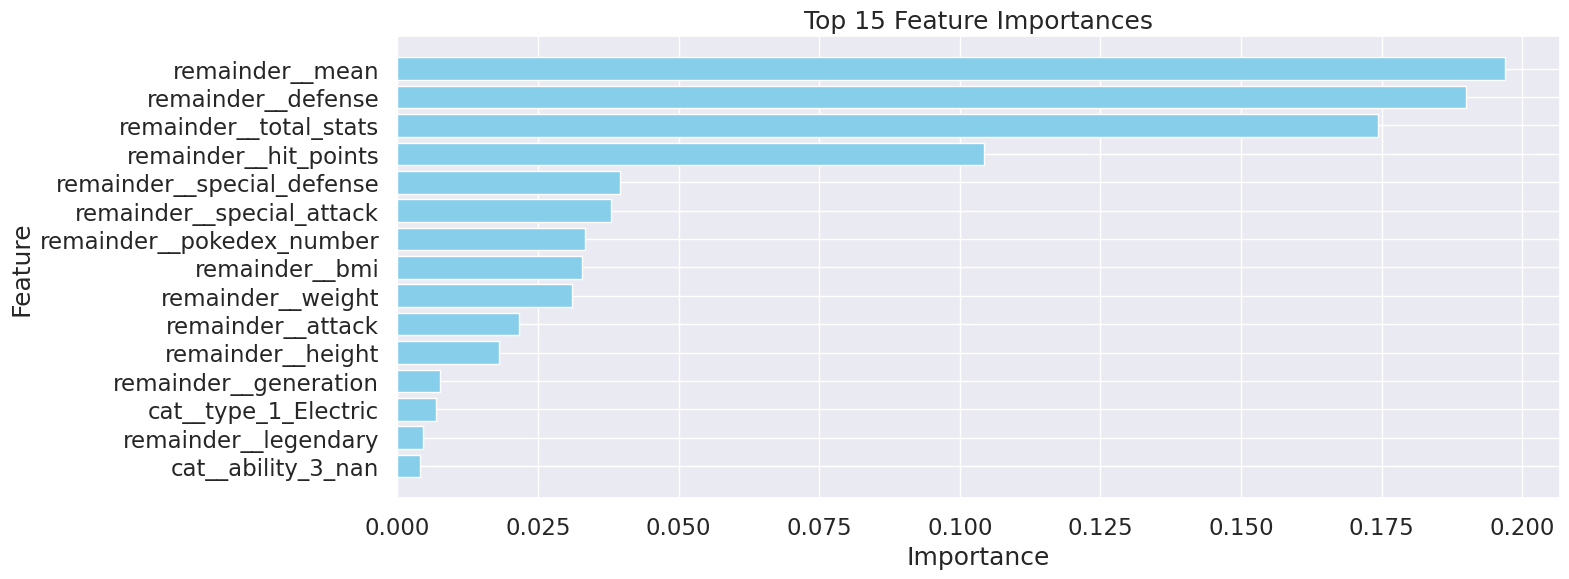

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(15, 6))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


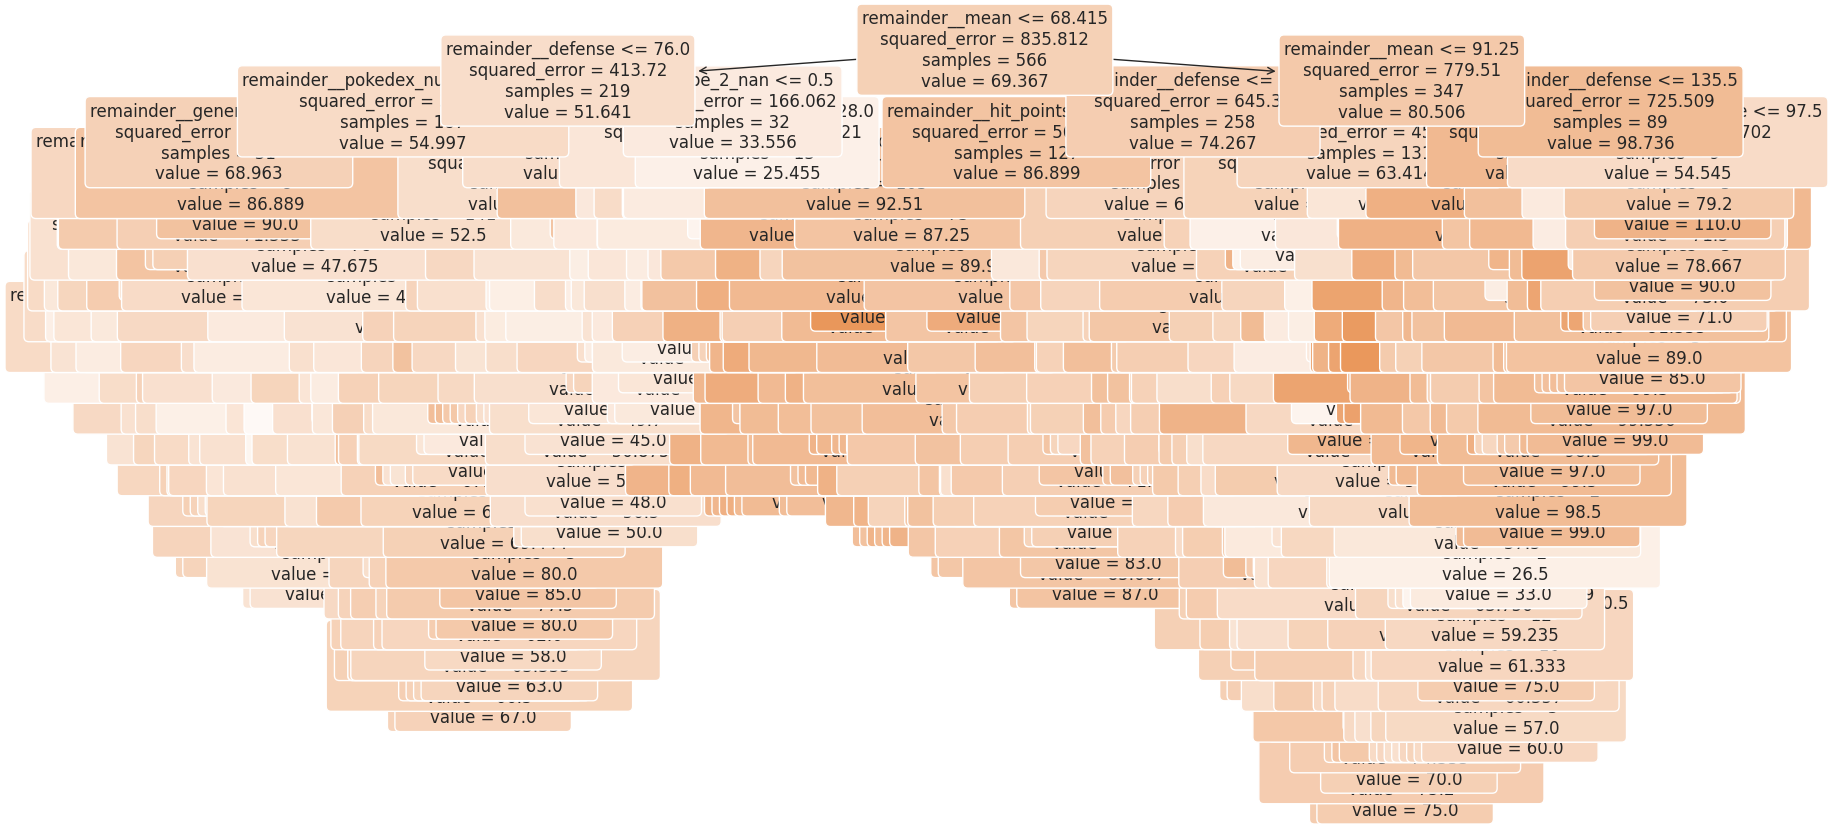

In [41]:
from sklearn.tree import plot_tree

# Visualizing only one tree for simplicity
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()


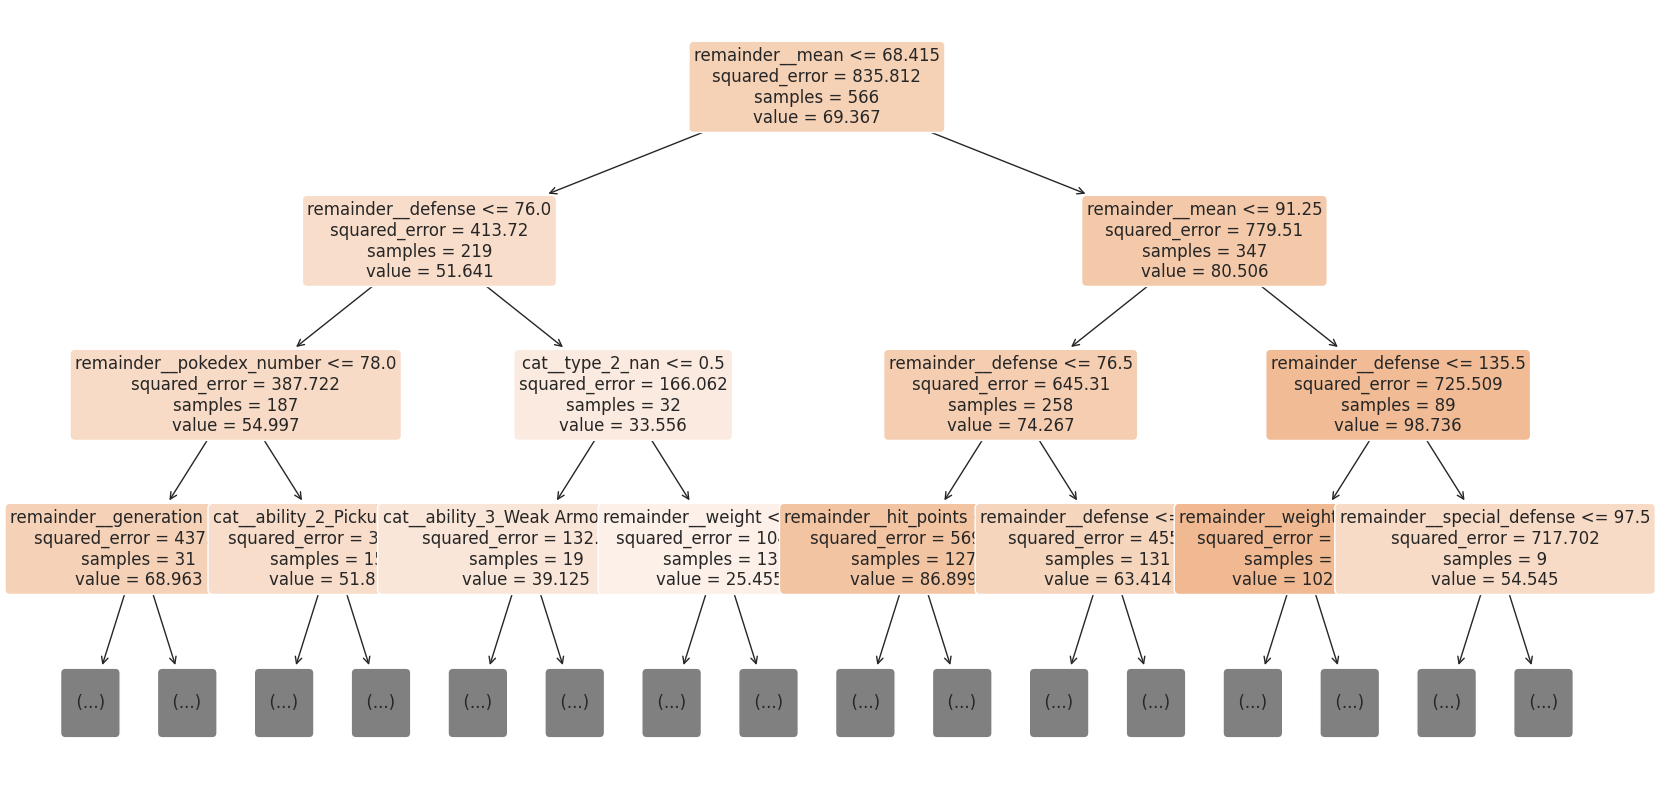

In [42]:
from sklearn.tree import plot_tree

# Visualizing only one tree for simplicity
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree,
          feature_names=feature_names,
          max_depth=3,  # Limiting depth for simplicity
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()


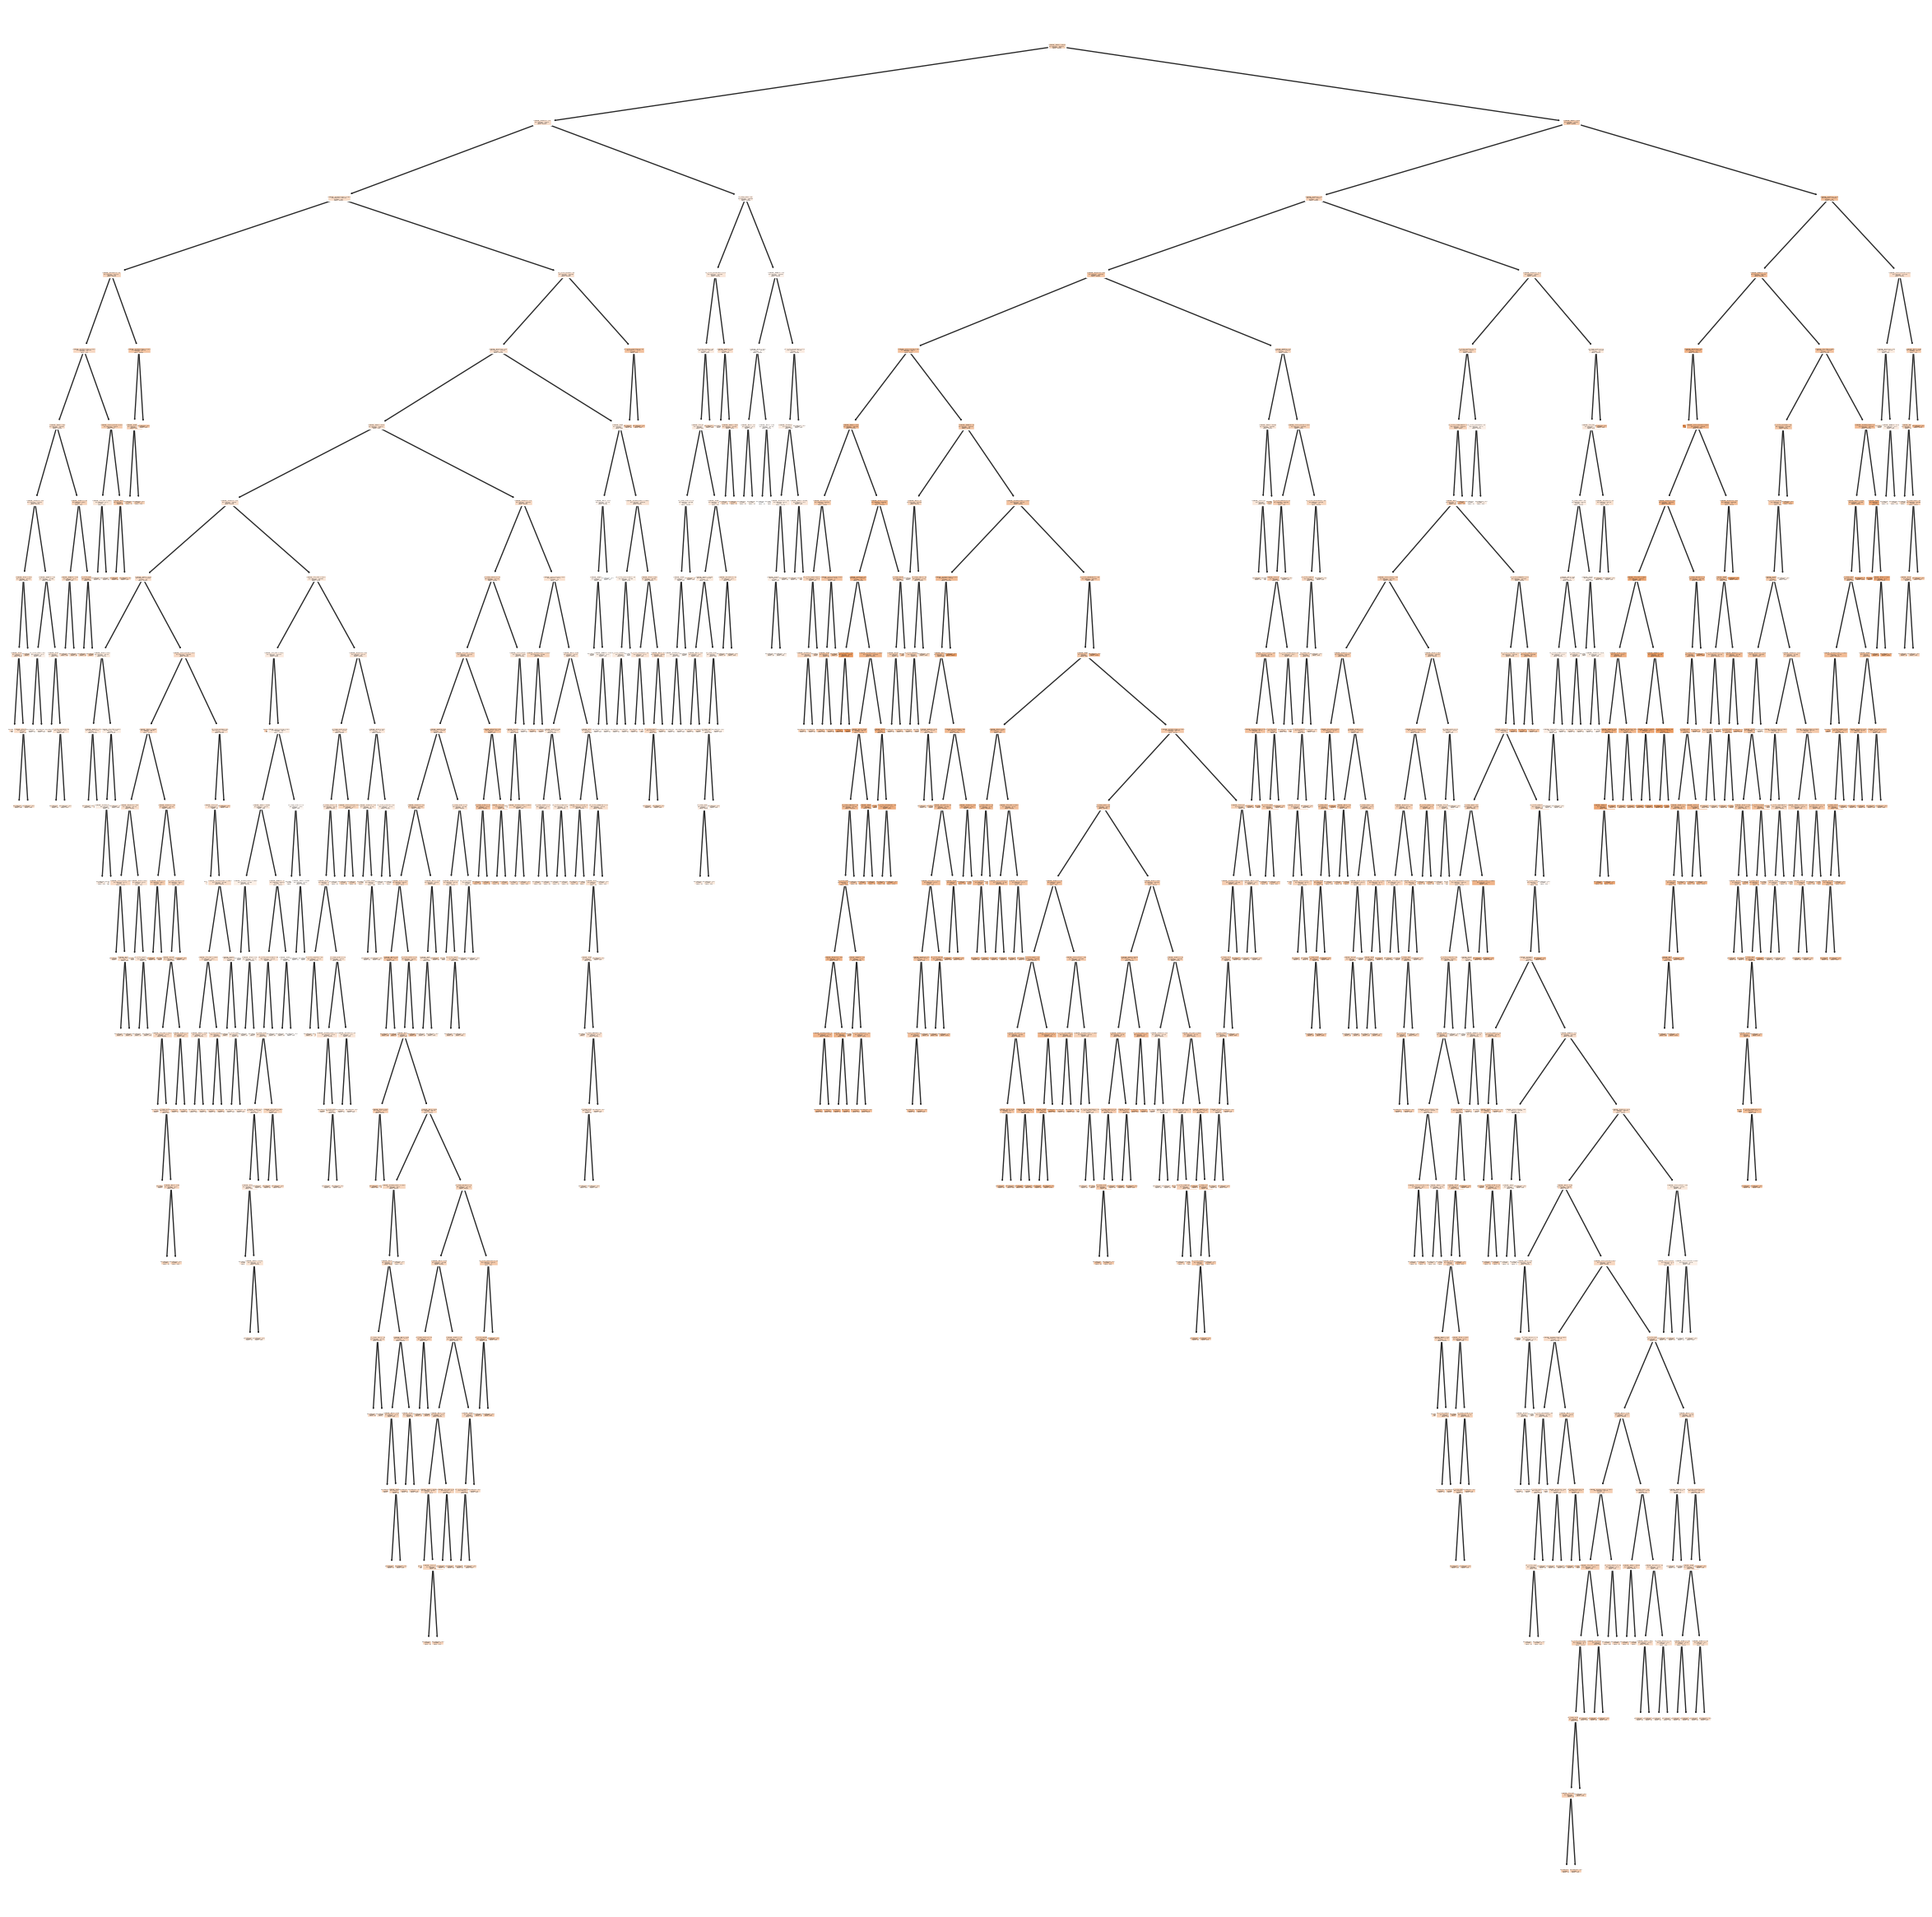

Training MAE: 4.710514541387024
Test MAE: 11.943169642857143


In [43]:
plt.figure(figsize=(30, 30))  # Increase figure size to better accommodate the tree's complexity
plot_tree(rf_model.estimators_[0], feature_names=preprocessor.get_feature_names_out(), filled=True, max_depth=None)
plt.savefig('tree_high_res.png', dpi=300, bbox_inches='tight')  # Save to a high-resolution file
plt.show()

# Compute MAE on training and test data
train_preds = rf_model.predict(X2_train)
train_mae = mean_absolute_error(y2_train, train_preds)
test_preds = rf_model.predict(X2_test)  # Assuming X2_test and y2_test are your test set
test_mae = mean_absolute_error(y2_test, test_preds)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

# **3. Use auto ml to find the best model**


## We are now updating our new selected features to new frame and using it for h2o.

In [44]:
import h2o
from h2o.frame import H2OFrame

# Initialize the H2O cluster
h2o.init()

# Convert pandas DataFrame to H2OFrame
X2 = dfpd[['attack', 'defense', 'special_attack', 'special_defense', 'type_1', 'type_2',
           'ability_1', 'ability_2', 'ability_3', 'pokedex_number', 'height', 'weight', 'bmi',
           'mean', 'generation', 'mega_evolution', 'legendary', 'total_stats', 'hit_points']]
y2 = dfpd['speed']

# Combine features and target into a single pandas DataFrame
dfpd_combined = X2.assign(speed=y2)

# Convert the combined pandas DataFrame to an H2OFrame
df_h2o = H2OFrame(dfpd_combined)

# Now df_h2o is ready to be used with H2O


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         2 mins 26 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_bzgw6j
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
df_h2o

attack    defense    special_attack    special_defense  type_1    type_2    ability_1    ability_2      ability_3    pokedex_number    height    weight    bmi    mean    generation  mega_evolution    legendary      total_stats    hit_points    speed
--------  ---------  ----------------  -----------------  --------  --------  -----------  -----------  -----------  ----------------  --------  --------  -----  ------  ------------  ----------------  -----------  -------------  ------------  -------
      49         49                65                 65  Grass     Poison    Overgrow     Chlorophyll          nan                 1       0.7       6.9   14.1   53                1  False             False                  318            45       45
      62         63                80                 80  Grass     Poison    Overgrow     Chlorophyll          nan                 2       1        13     13     67.5              1  False             False                  405            60       60
     100        123               122                120  Grass     Poison    Thick Fat    nan                  nan                 3       2.4     155.5   27    104.17             6  True              False                  625            80       80
      82         83               100                100  Grass     Poison    Overgrow     Chlorophyll          nan                 3       2       100     25     87.5              1  False             False                  525            80       80
      82         83               100                100  Grass     Poison    Overgrow     Chlorophyll          nan                 3      24     10000     17.4   87.5              8  False             False                  525            80       80
      52         43                60                 50  Fire      nan       Blaze        Solar Power          nan                 4       0.6       8.5   23.6   51.5              1  False             False                  309            39       65
      64         58                80                 65  Fire      nan       Blaze        Solar Power          nan                 5       1.1      19     15.7   67.5              1  False             False                  405            58       80
      84         78               109                 85  Fire      Flying    Blaze        Solar Power          nan                 6       1.7      90.5   31.3   89                1  False             False                  534            78      100
      84         78               109                 85  Fire      Flying    Blaze        Solar Power          nan                 6      28     10000     12.8   89                8  False             False                  534            78      100
     130        111               130                 85  Fire      Dragon    Tough Claws  nan                  nan                 6       1.7     110.5   38.2  105.67             6  True              False                  634            78      100
[1118 rows x 20 columns]

The feature selected dataset has been imported to the h2o lib.

## Creating a training split


In [46]:
import h2o

# Initialize H2O cluster
h2o.init()

# Define the percentages for train, validation, and test sets
pct_train = 0.70
pct_val = 0.15
pct_test = 0.15

# Split the data into train, validation, and test sets
df_h2o_train, df_h2o_val, df_h2o_test = df_h2o.split_frame(ratios=[pct_train, pct_val], seed=1234)

# Print the number of rows in each set
print("Training set:", df_h2o_train)
print("Validation set:", df_h2o_val)
print("Test set:", df_h2o_test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         2 mins 27 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_bzgw6j
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Training set:   attack    defense    special_attack    special_defense  type_1    type_2    ability_1    ability_2      ability_3    pokedex_number    height    weight    bmi    mean    generation  mega_evolution    legendary      total_stats    hit_points    speed
      62         63                80                 80  Grass     Poison    Overgrow     Chlorophyll          nan                 2       1        13     13     67.5              1  False             False                  405            60       60
     100        123               122                120  Grass     Poison    Thick Fat    nan                  nan                 3       2.4     155.5   27    104.17             6  True              False                  625            80       80
      82         83               100                100  Grass     Poison    Overgrow     Chlorophyll          nan                 3      24     10000     17.4   87.5              8  False             False                  525  

## H2O Summary

In [47]:
from h2o.automl import H2OAutoML

# Specify your target variable
target = "speed"  # Adjust this to your actual target variable name

# Specify the feature names (excluding the target variable)
feature_names = df_h2o_train.col_names
feature_names.remove(target)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=60,  # Feel free to adjust the time limit
                max_models=20,  # and the maximum number of models
                seed=1234,
                sort_metric="MAE")  # Use MAE for sorting models

aml.train(x=feature_names, y=target, training_frame=df_h2o_train, leaderboard_frame=df_h2o_val)

# Print the AutoML Leaderboard
print(aml.leaderboard)

# Predict on the test set using the best model
preds = aml.leader.predict(df_h2o_test)

# Calculate MAE on the test set
test_actual = df_h2o_test[target].as_data_frame()  # Convert to pandas for easy calculation
test_preds = preds.as_data_frame()
test_mae = (test_actual - test_preds).abs().mean()[0]  # Assuming the prediction column is named predict

print(f"Test MAE: {test_mae}")


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                               mae     rmse      mse     rmsle    mean_residual_deviance
XGBoost_3_AutoML_1_20240318_03426  10.2536  14.2163  202.104  0.2713                     202.104
XGBoost_1_AutoML_1_20240318_03426  10.9431  14.49    209.961  0.287089                   209.961
XGBoost_2_AutoML_1_20240318_03426  11.0828  15.2431  232.352  0.297853                   232.352
GBM_4_AutoML_1_20240318_03426      14.3072  19.4891  379.824  0.349674                   379.824
GBM_3_AutoML_1_20240318_03426      14.6     19.6793  387.275  0.348815                   387.275
GBM_2_AutoML_1_20240318_03426      14.6382  20.4358  417.62   0.362123                   417.62
DRF_1_AutoML_1_20240318_03426      15.2535  20.3528  414.237  0.368561                   414.237
GBM_1_AutoML_1_20240318_03426      15.3791  20.803   432.766  0.365504                   432.766
GLM_1_AutoML_1_20240318_03426    

In [48]:
# Get and print the model summary of the best model
best_model_summary = aml.leader.summary()
print(best_model_summary)

Model Summary: 
    number_of_trees
--  -----------------
    70


In [49]:
# Get the best model
best_model = aml.leader

# Print the model ID of the best model
print("Best Model ID:", best_model.model_id)


Best Model ID: XGBoost_3_AutoML_1_20240318_03426


In [50]:
# Get performance on the test set
performance = best_model.model_performance(df_h2o_test)

# Print out the performance metrics
print(performance)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 213.67917225765927
RMSE: 14.61776905884271
MAE: 11.264877782065488
RMSLE: 0.24316654731996354
Mean Residual Deviance: 213.67917225765927


In [51]:
# Assuming df_h2o_new_data is your new H2OFrame data
predictions = best_model.predict(df_h2o)

# View the predictions
predictions.head()


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
---------
  48.9072
  66.3401
  79.6376
  91.9187
  79.9774
  67.6261
  79.8998
 103.825
  99.9795
  69.0082
[10 rows x 1 column]

## SHAP

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

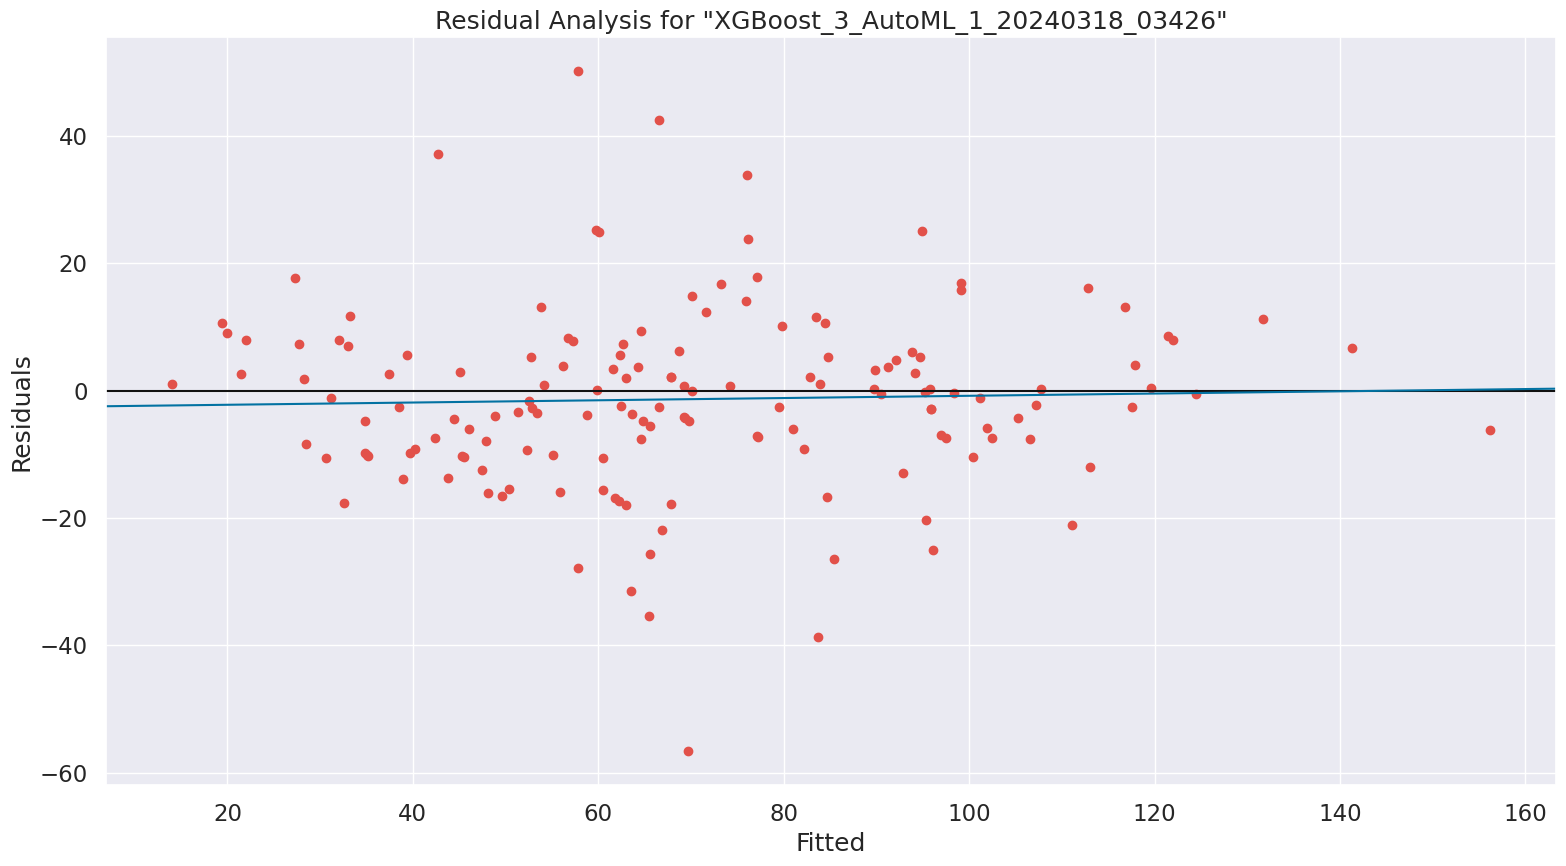

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

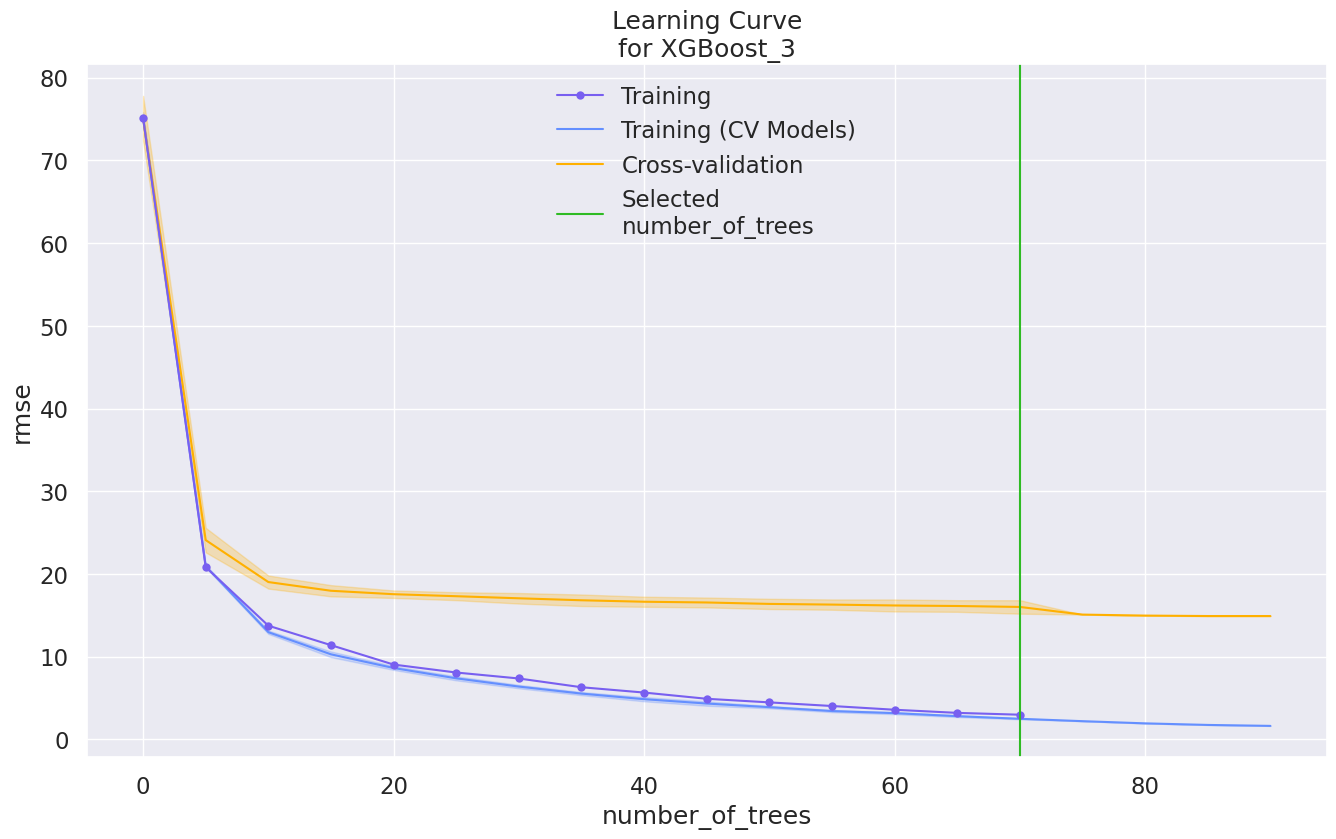

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

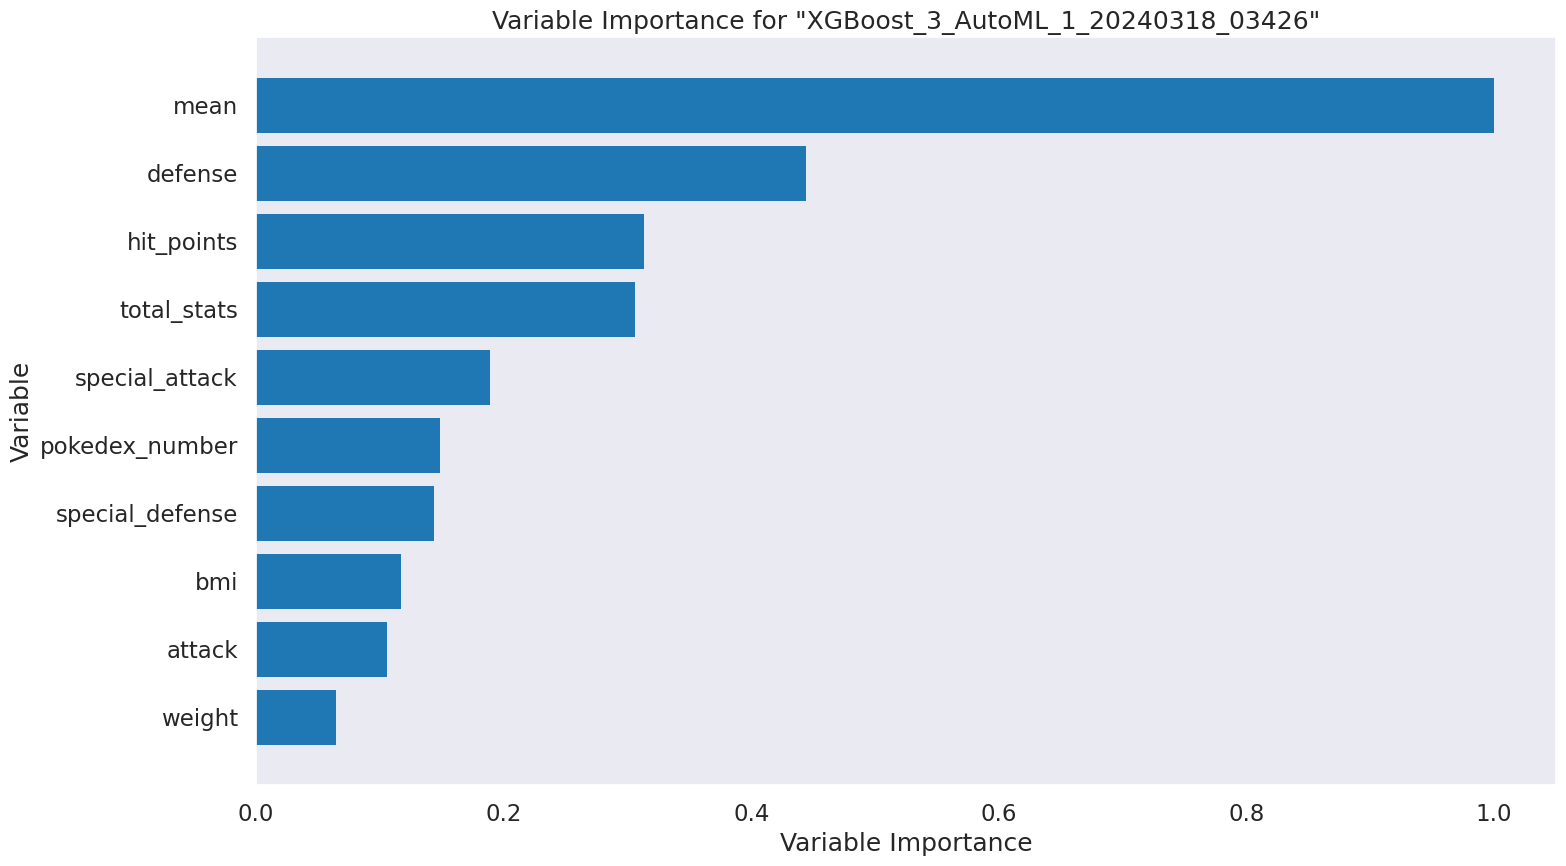

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

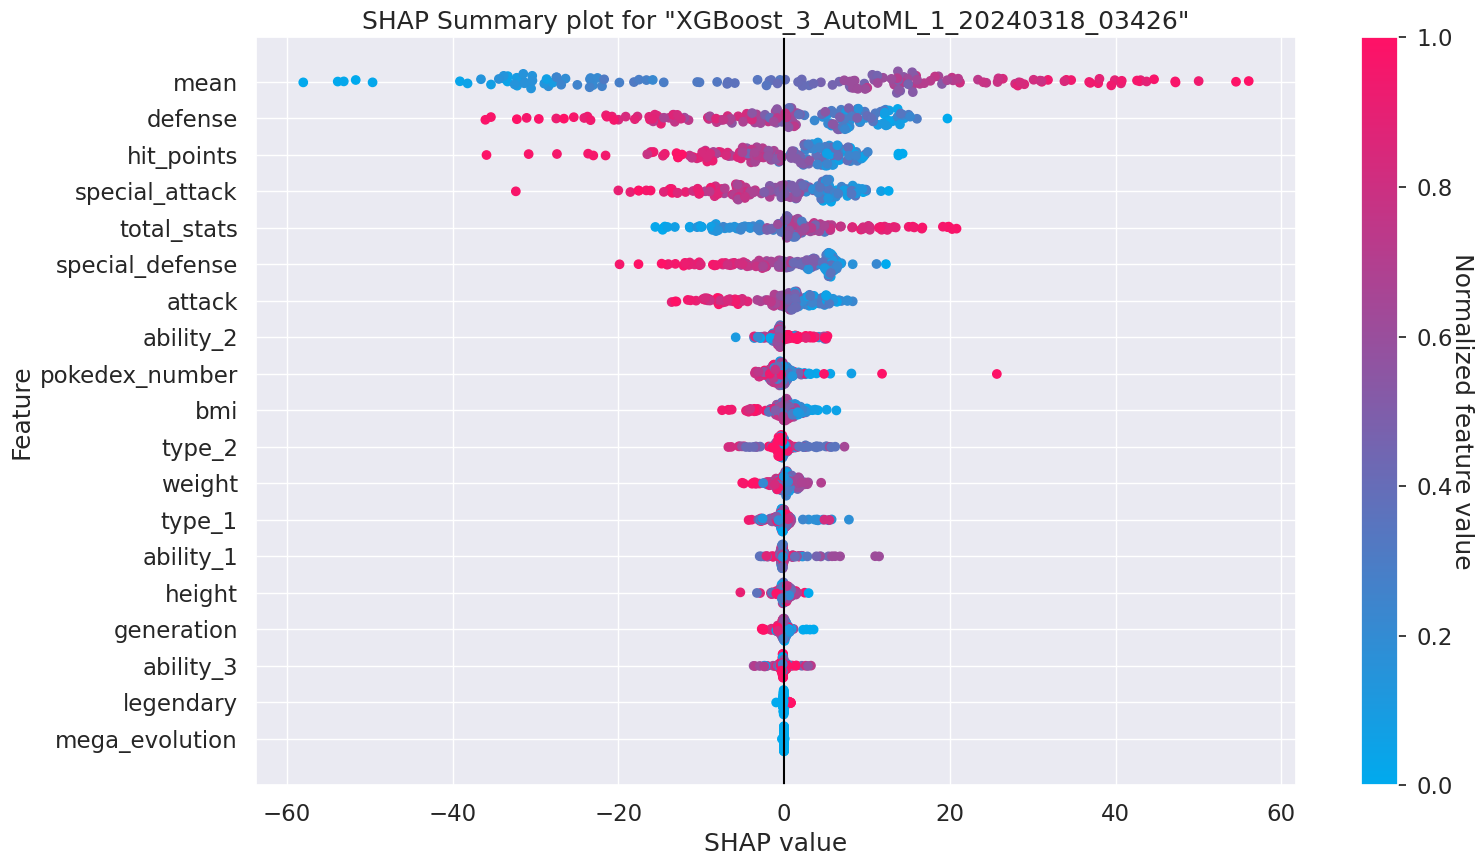

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

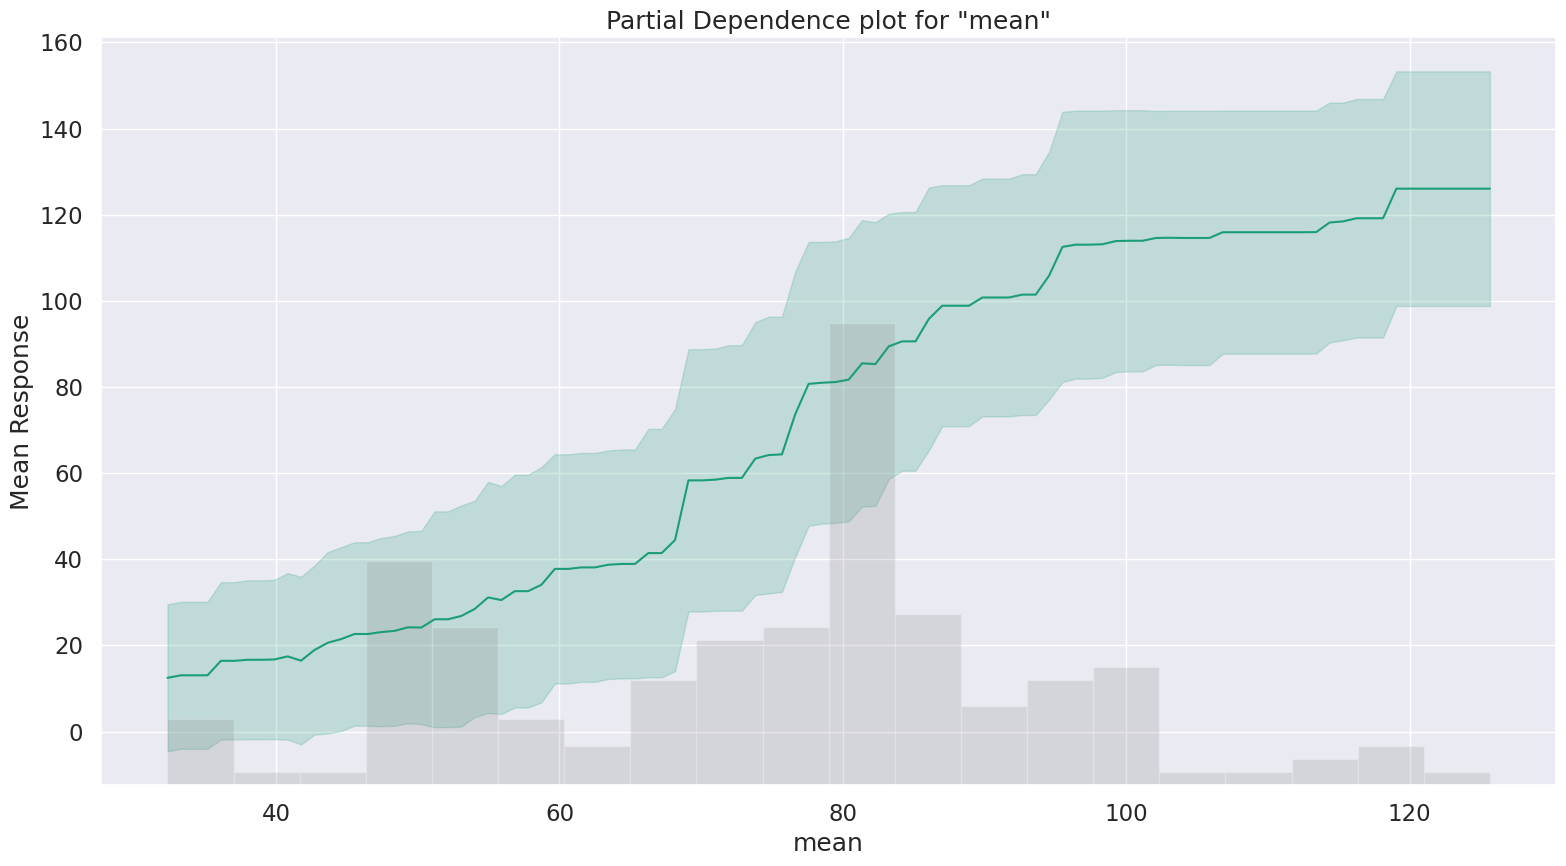

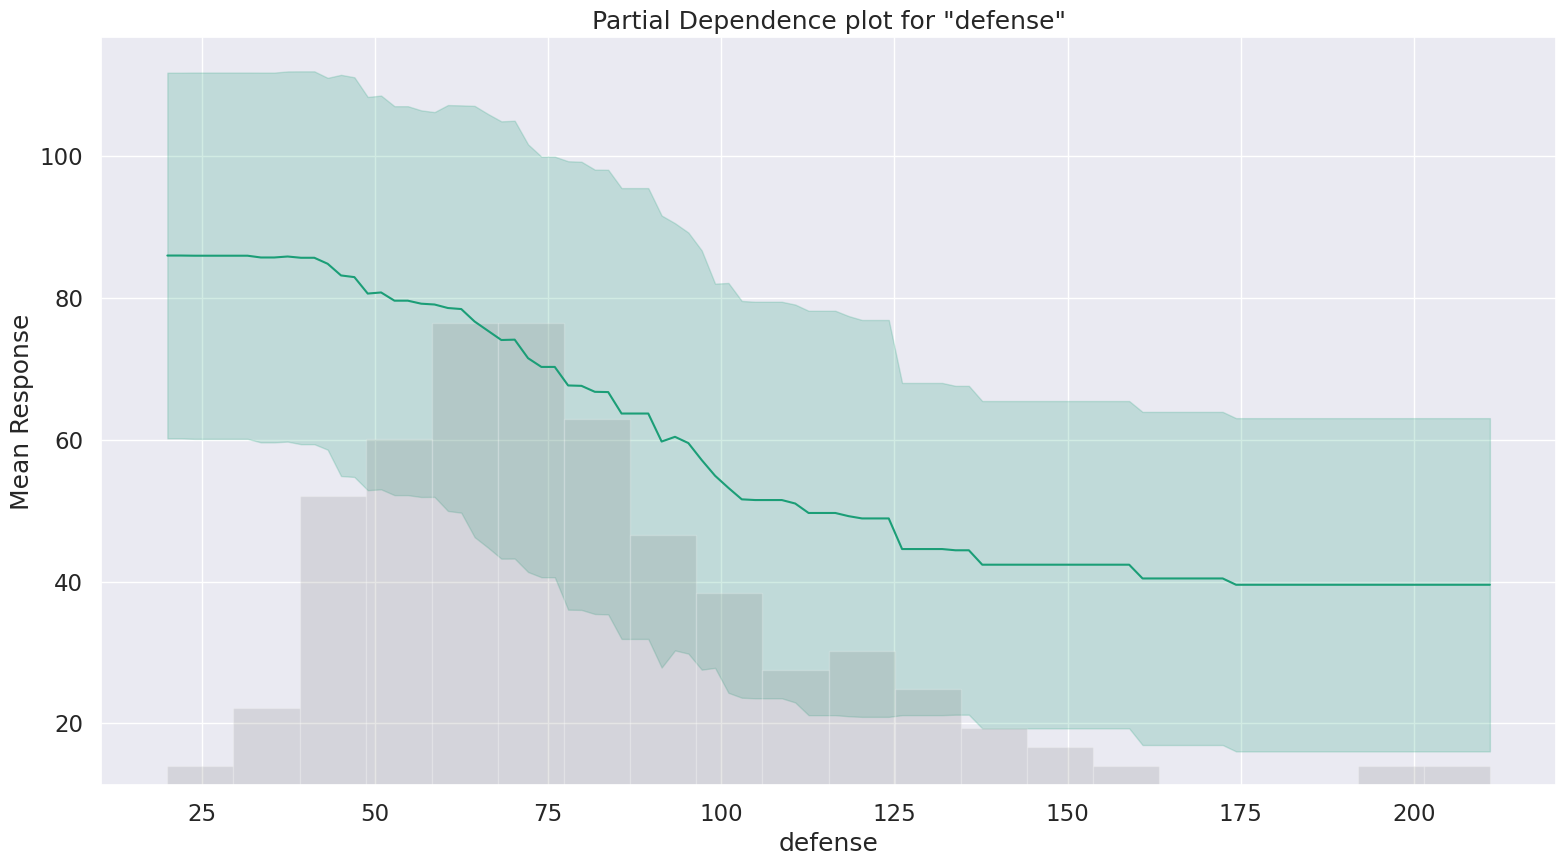

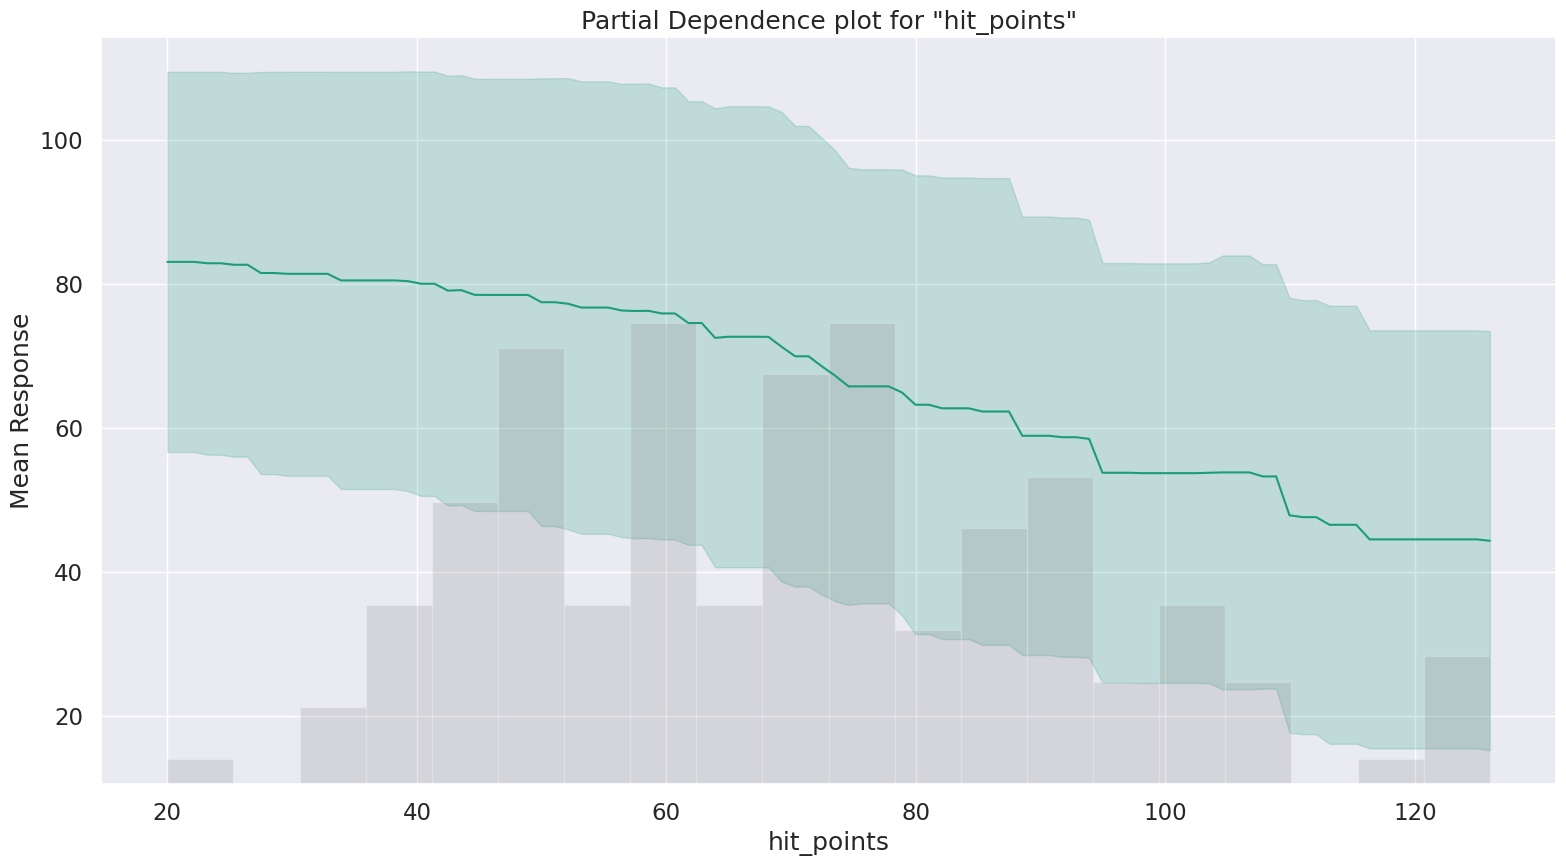

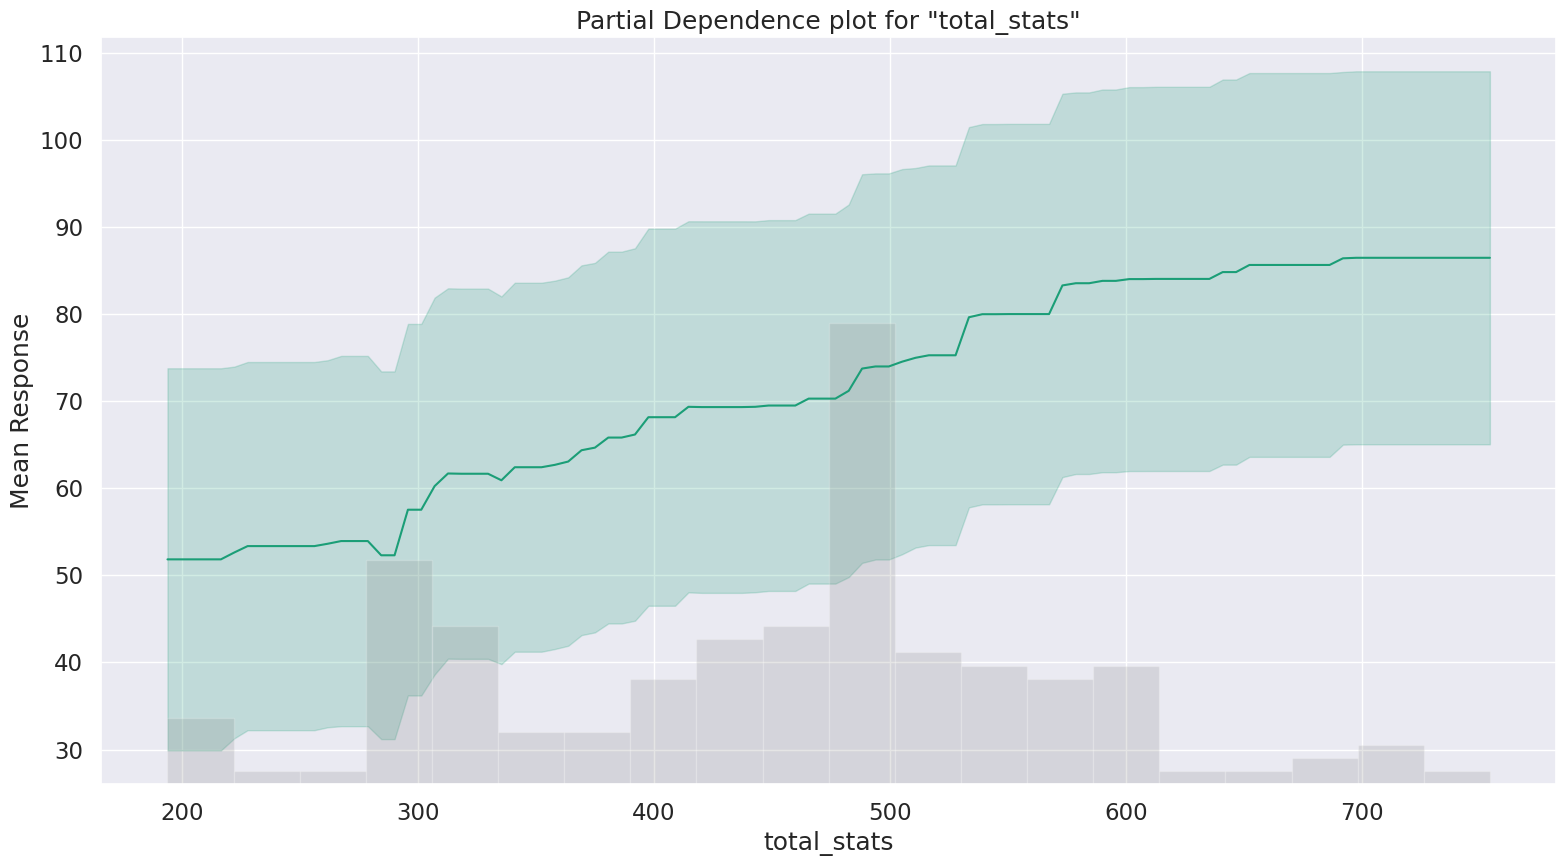

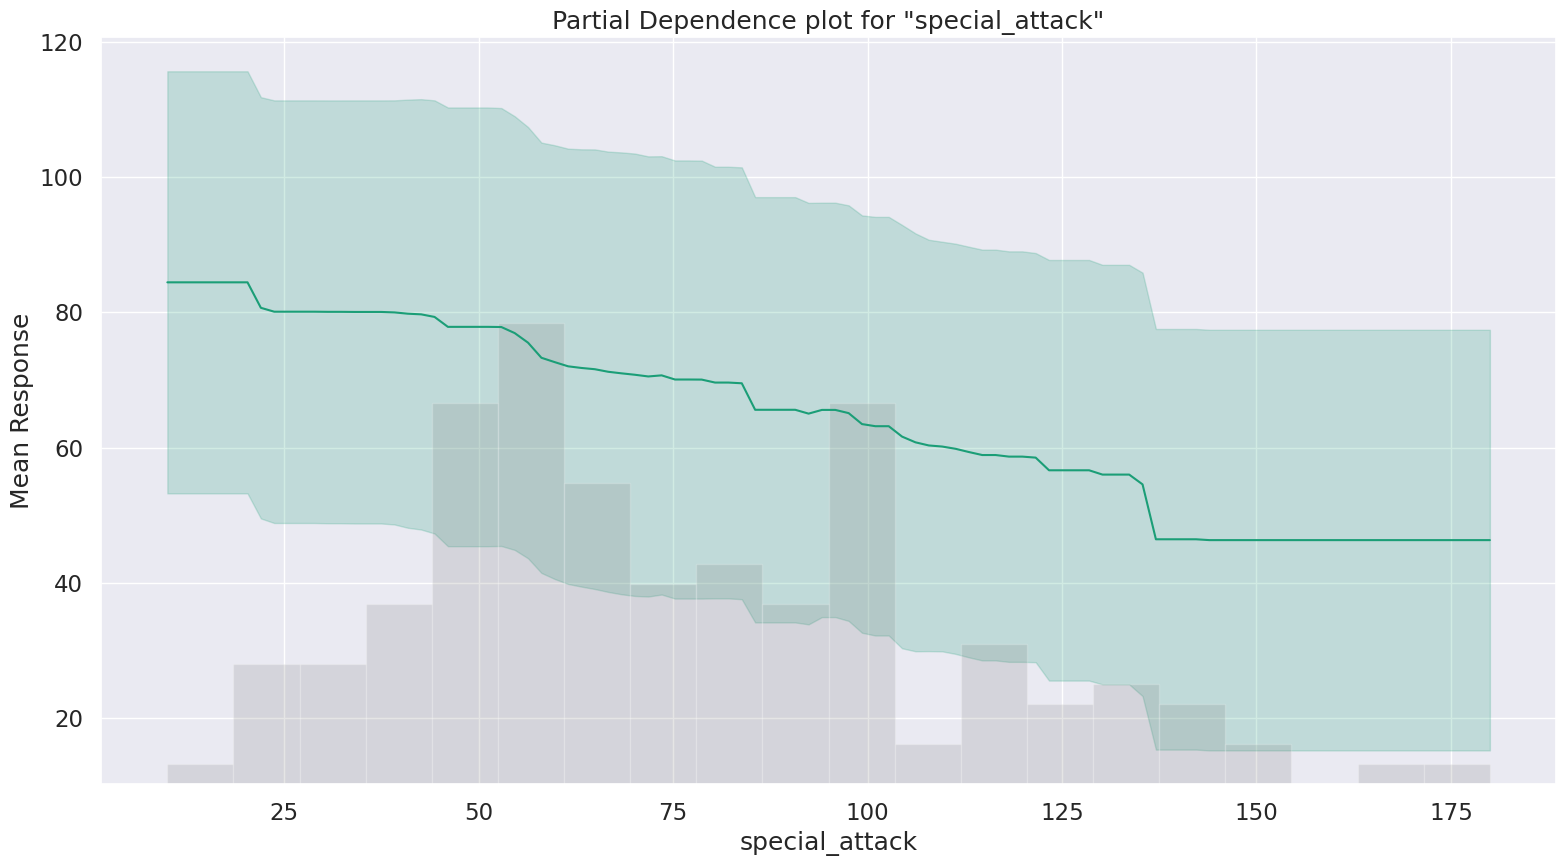

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

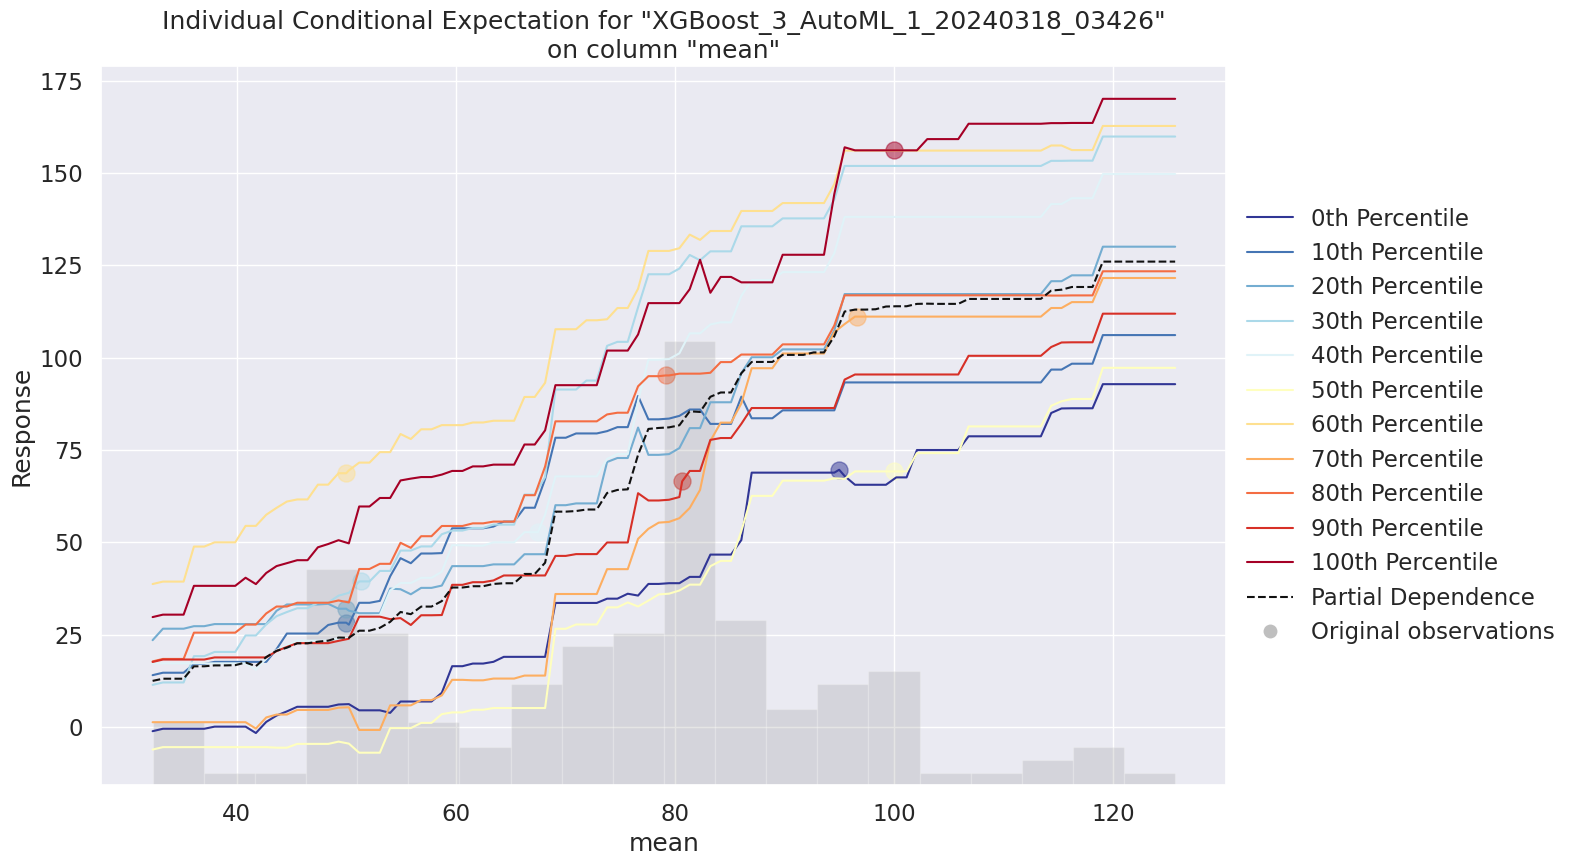

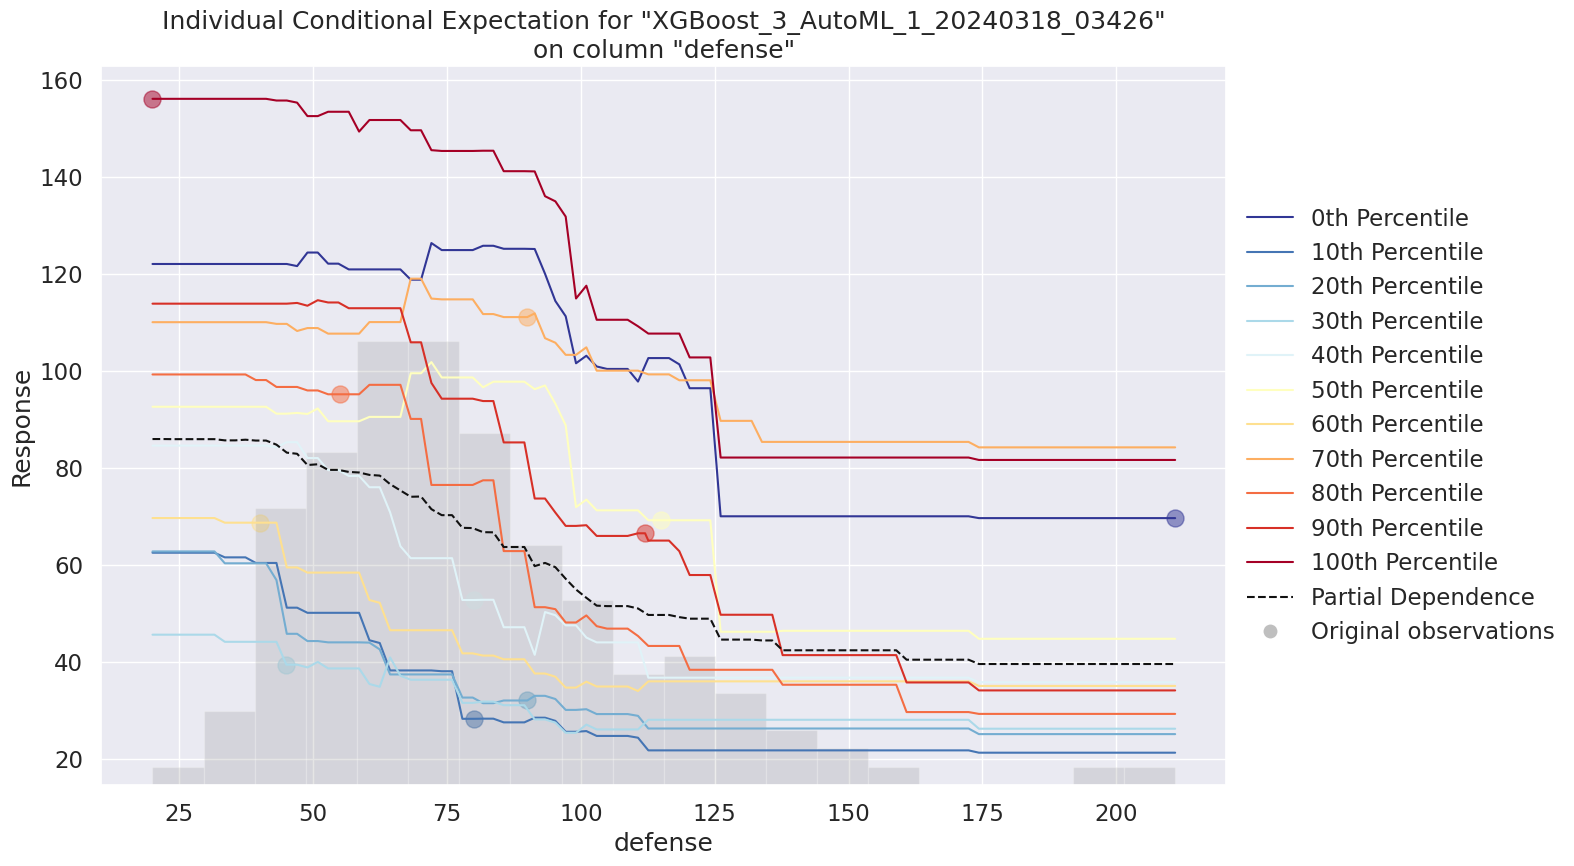

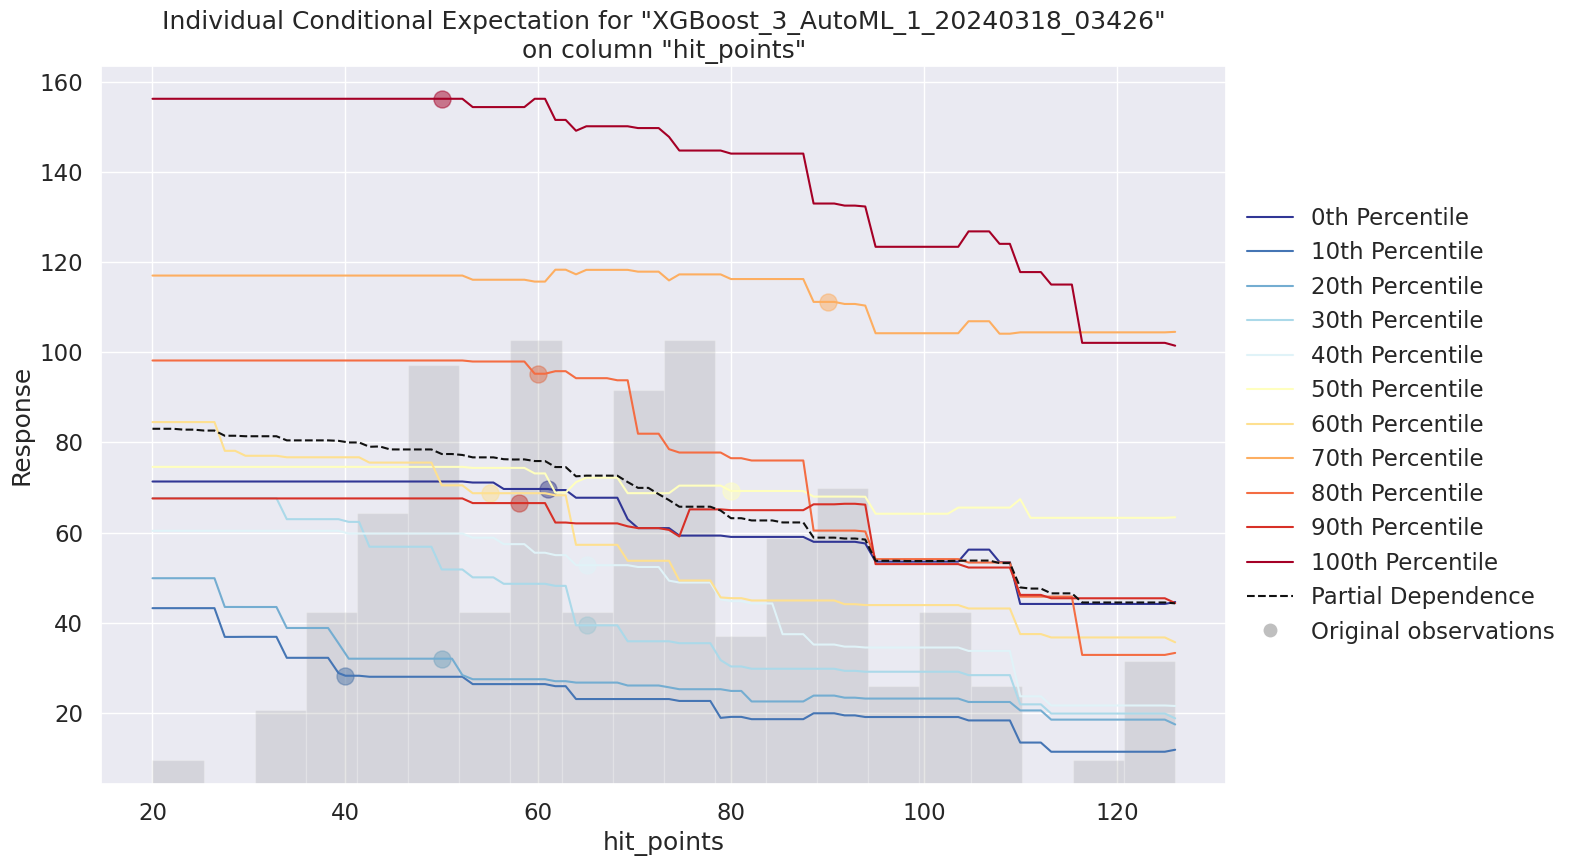

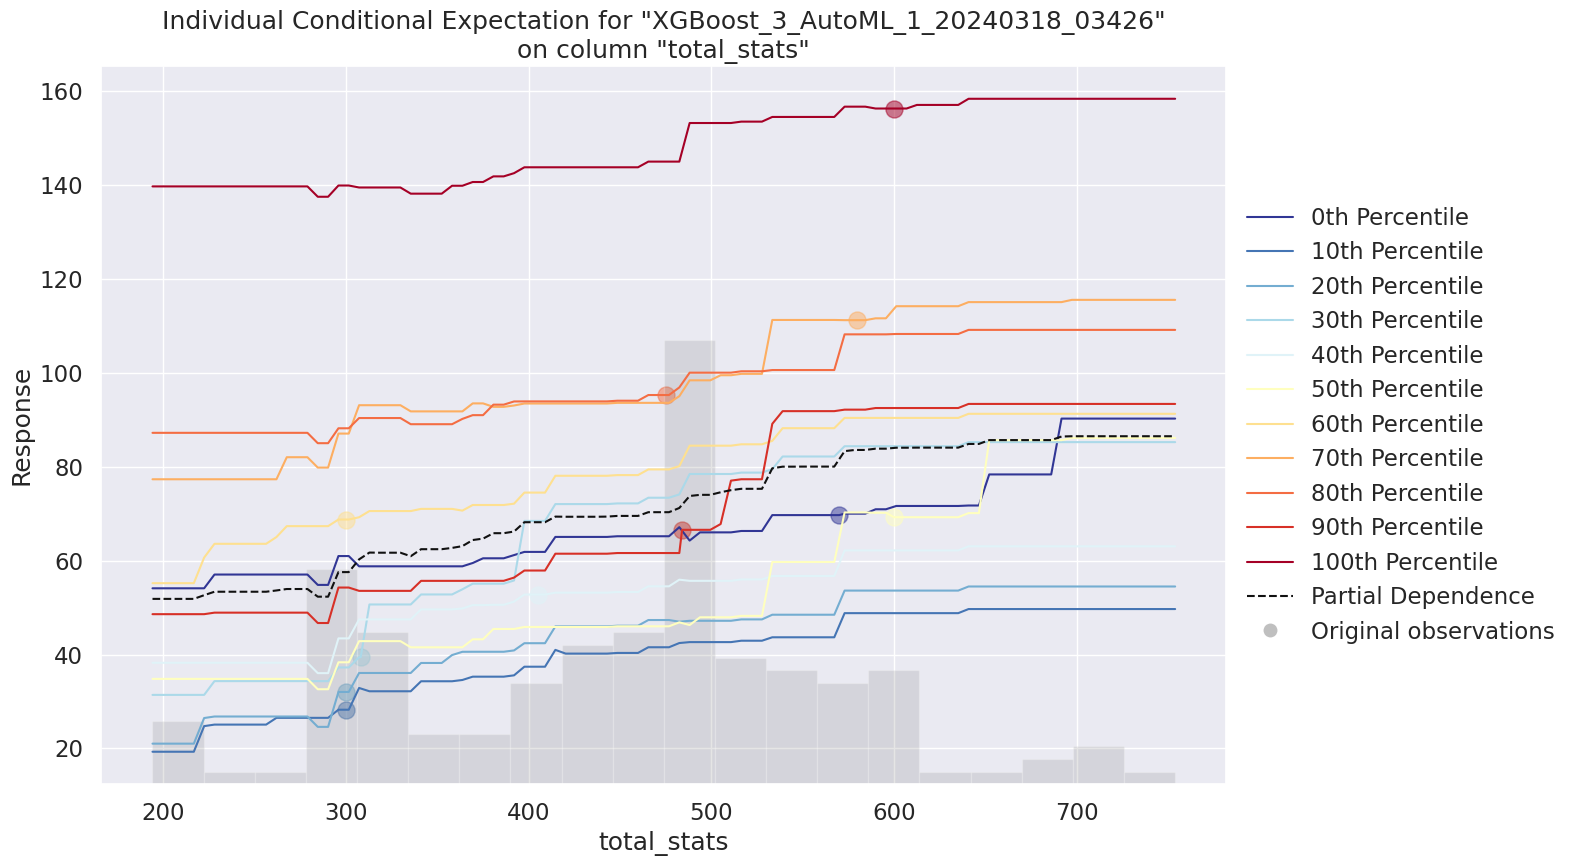

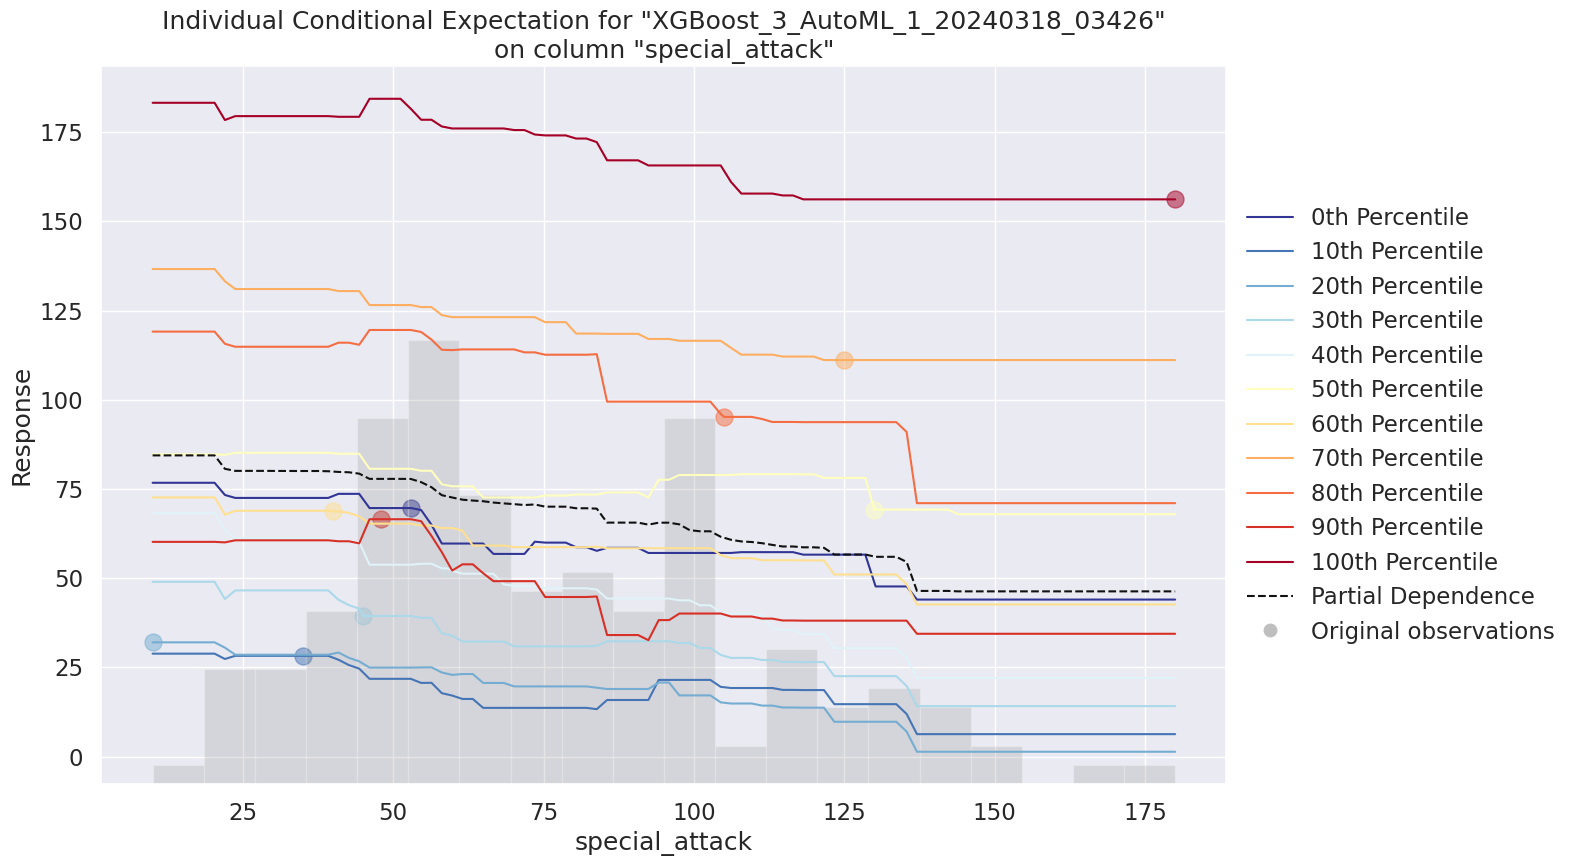



H2OExplanation([('residual_analysis', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7ae65c193490>), ('description', <h2o.explanation._explain.Description object at 0x7ae65c190640>), ('plots', H2OExplanation([('XGBoost_3_AutoML_1_20240318_03426', <h2o.plot._plot_result._MObject object at 0x7ae65cba78e0>)]))])), ('learning_curve', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7ae65cbe7a60>), ('description', <h2o.explanation._explain.Description object at 0x7ae65cdd0610>), ('plots', H2OExplanation([('XGBoost_3_AutoML_1_20240318_03426', <h2o.plot._plot_result._MObject object at 0x7ae6449604f0>)]))])), ('varimp', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7ae64489ef80>), ('description', <h2o.explanation._explain.Description object at 0x7ae677ef6d40>), ('plots', H2OExplanation([('XGBoost_3_AutoML_1_20240318_03426', <h2o.plot._plot_result._MObject object at 0x7ae644a2b520>)]))])), ('shap_summary', H2OExplanatio

In [52]:
best_model = aml.leader

# Now you can explain the best model
explanation = best_model.explain(df_h2o_val)

# Print or inspect the explanation
print(explanation)

In [54]:
lb = aml.leaderboard
print(lb)

model_id                               mae     rmse      mse     rmsle    mean_residual_deviance
XGBoost_3_AutoML_1_20240318_03426  10.2536  14.2163  202.104  0.2713                     202.104
XGBoost_1_AutoML_1_20240318_03426  10.9431  14.49    209.961  0.287089                   209.961
XGBoost_2_AutoML_1_20240318_03426  11.0828  15.2431  232.352  0.297853                   232.352
GBM_4_AutoML_1_20240318_03426      14.3072  19.4891  379.824  0.349674                   379.824
GBM_3_AutoML_1_20240318_03426      14.6     19.6793  387.275  0.348815                   387.275
GBM_2_AutoML_1_20240318_03426      14.6382  20.4358  417.62   0.362123                   417.62
DRF_1_AutoML_1_20240318_03426      15.2535  20.3528  414.237  0.368561                   414.237
GBM_1_AutoML_1_20240318_03426      15.3791  20.803   432.766  0.365504                   432.766
GLM_1_AutoML_1_20240318_03426      26.1455  31.0989  967.139  0.520917                   967.139
[9 rows x 6 columns]



# **STEP 4. interpret the SHAP values and compare.**

- **SHAP Values**: These values represent the impact of each feature on the model's output. A SHAP value for a feature represents how much knowing that feature moves the output from the base (average over the dataset) prediction.

- **Features**: Listed on the y-axis, each row represents a different feature that the model is using to make its predictions. The order of the features is typically sorted by the sum of SHAP value magnitudes across all samples.

- **Impact on Model Output**: The x-axis shows the range of the SHAP values for each feature. Points to the right of the zero line indicate that the presence of that feature pushes the model's prediction higher (for a regression problem, it would be a higher numerical prediction; for classification, a higher likelihood of a positive class). Points to the left suggest the opposite.

- **Feature Value**: The color indicates the value of the feature for each individual instance, from low (blue) to high (red). This helps to identify not just how much impact each feature has, but in which direction that impact tends to be based on the feature value.


## **Linear Model**

---



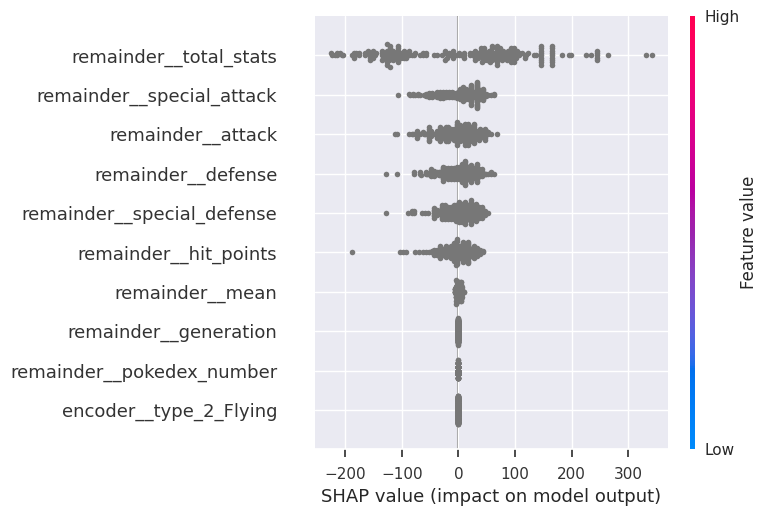

In [55]:
import shap

# Fit your linear regression model
regressor_X2 = LinearRegression()
regressor_X2.fit(X2_train, y2_train)

# Initialize the SHAP LinearExplainer with the linear model and the training data
explainer = shap.LinearExplainer(regressor_X2, X2_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X2_test)

# Create a summary plot using the SHAP values
# Note: Adjust 'max_display' as desired to show more or fewer features
shap.summary_plot(shap_values, X2_test, feature_names=one_hot_encoder_X2.get_feature_names_out(), max_display=10)


- The color scale (from low to high) on the right indicates the feature value (not the SHAP value). For numerical features, low to high corresponds to low to high feature values. It shows that higher feature values (in pink/red) might have a higher or lower impact, depending on their position along the x-axis.
- The plot for `remainder__total_stats` indicates it has a high and positive impact on the model's predictions. The majority of the SHAP values for this feature are positive, suggesting that higher total stats typically increase the predicted value.
- Conversely, features like `encoder__type_2_Flying` seem to have a more neutral or potentially slightly negative impact on the prediction, given the clustering of SHAP values around zero and some negative values.
- The density of the dots can also give an idea about the distribution of the impact; wider sections mean more observations fall into that range of SHAP values.

This type of plot can be particularly useful for understanding model behavior in a more granular way, identifying not just which features are important, but also how the value of each feature impacts the model's predictions.

## **Random Forest Model**

---



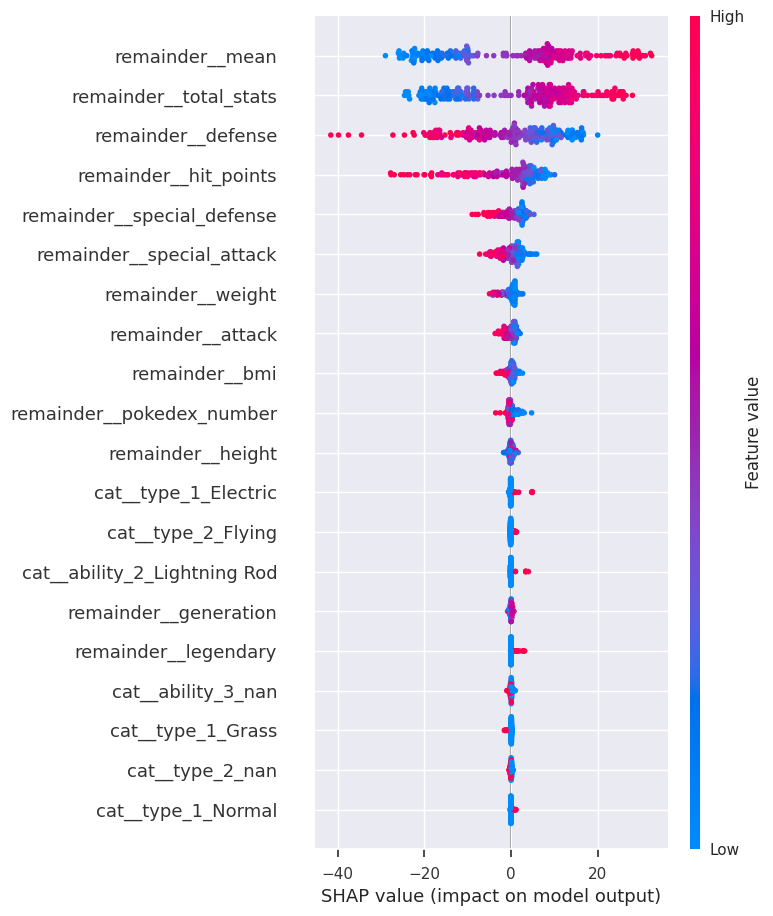

In [56]:
import shap

# Convert your training and test data to dense arrays if they are sparse
X2_train_dense = X2_train.toarray() if hasattr(X2_train, 'toarray') else X2_train
X2_test_dense = X2_test.toarray() if hasattr(X2_test, 'toarray') else X2_test

# Initialize the SHAP explainer using your RandomForestRegressor and training data
explainer = shap.Explainer(rf_model, X2_train_dense)

# Compute SHAP values for the test data, bypassing the additivity check
shap_values = explainer.shap_values(X2_test_dense, check_additivity=False)

# Continue with your SHAP summary plot or other analysis
shap.summary_plot(shap_values, X2_test_dense, feature_names=preprocessor.get_feature_names_out())



The second SHAP summary plot, like the first, visualizes the impact of each feature on the model's predictions, but with a few differences in the features presented and the distribution of SHAP values.

Comparing the two:

1. **Feature Names and Types**: Both plots have features related to `remainder_`, which likely indicates that these are raw numerical or categorical features kept after some preprocessing step. There are also `cat_` prefixed features in the second plot, which might indicate categorical features that have been one-hot encoded or similarly transformed (like `cat_type_1_Electric`).

2. **Range of SHAP Values**: The range of SHAP values in the second plot is much narrower compared to the first plot, suggesting a potentially lesser degree of individual feature impact on the model predictions.

3. **Impact Direction**: In the second plot, the `remainder__mean` feature has the largest spread of SHAP values and appears to have a substantial positive impact when its feature value is high (pink dots). This contrasts with the first plot, where `remainder__total_stats` had a large positive impact, indicating that different features are most influential in the two models (or possibly two different versions of the same model).

4. **Feature Values**: Both plots use color to indicate the feature value (not the SHAP value), with pink/red indicating high feature values and blue indicating low feature values. For example, in the second plot, higher values of `remainder__mean` lead to a positive impact on the model output.

5. **Categorical Features**: In the second plot, there are several categorical features (like `cat_type_1_Electric` and `cat_type_2_Flying`), which show discrete clusters of SHAP values, reflecting the binary nature of their input (the feature is either present or not).

6. **Outliers**: There are some noticeable outliers, especially for features like `remainder__hit_points` and `remainder__attack`, where a few high feature values (pink dots) have a substantial negative impact on the model output.

7. **Density of Dots**: Similar to the first plot, denser areas indicate more common SHAP values for a feature, while sparser areas indicate less common values.

In summary, the second plot still shows how feature values affect the predictions of a model, but with different features and a different scale of impact. Features like `remainder__mean` and `remainder__total_stats` are prominent in their respective plots, suggesting they are key features for the model's predictions, though they seem to affect the predictions in different ways.

## **AutoML Model**

---



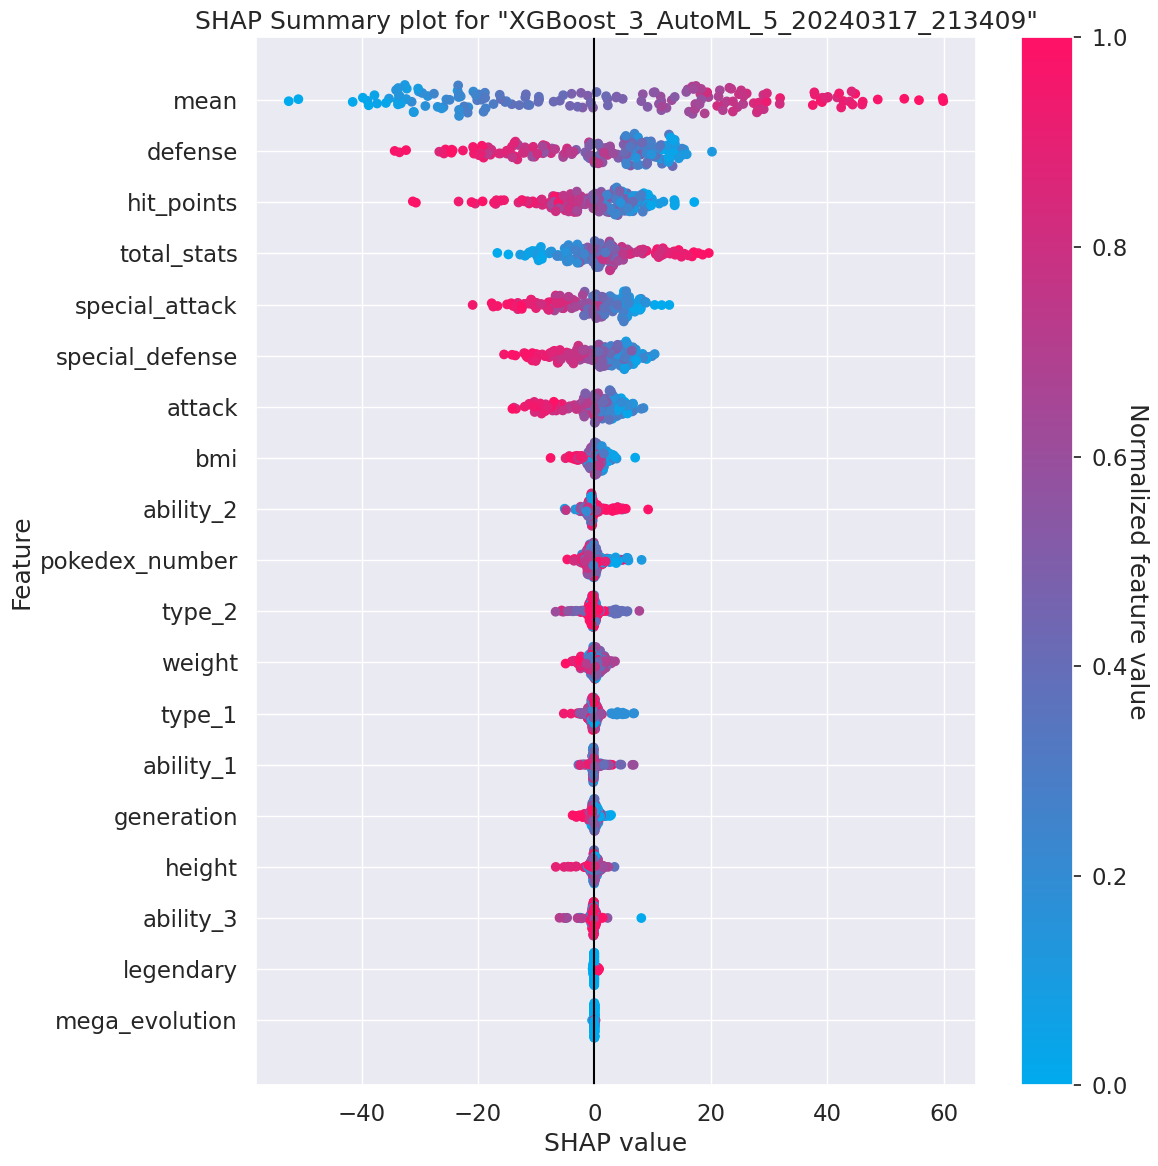

1. **Feature Importance**:
   - `mean` seems to be the most impactful feature on model output, followed by `defense` and `hit_points`.
   - Features towards the bottom like `mega_evolution` and `legendary` have less impact on the model's predictions.

2. **Impact Direction**:
   - Features shown with a cluster of pink dots to the right of the zero line (e.g., `mean`, `defense`, `hit_points`) generally have a positive impact on the model output when they have higher values.
   - Features with blue dots to the left of the zero line have a negative impact on the model output when they have lower values.

3. **Value of the Feature**:
   - The color intensity (pink for high, blue for low) indicates the feature value. For instance, high `mean` values (intense pink) push predictions higher (more positive SHAP values).

4. **Distribution and Magnitude of SHAP Values**:
   - The horizontal spread of the dots represents the range of the SHAP values for each feature across all data points.
   - A wider spread indicates a more variable impact on the predictions, suggesting that the feature interacts with other features or has a non-linear relationship with the target.
   - The position of the dot along the x-axis shows whether the feature's impact on the prediction is positive or negative.

5. **Potential Interactions and Non-linearities**:
   - Overlapping dots at different SHAP value levels suggest that the feature may have complex interactions with other features or affects the prediction in a non-linear way.
   - The plot doesn't show too much vertical dispersion in the dots, which implies that interactions might not be strongly present, or the model is primarily capturing the main effects.

Since the model was built using AutoML, it's likely that feature engineering and selection, along with hyperparameter tuning, were performed automatically to optimize model performance. The XGBoost model is a gradient boosting framework that builds an ensemble of decision trees in a sequential manner where each subsequent tree attempts to correct the errors of the previous trees. The overall prediction is a combination of the predictions from all trees.

## **AutoML vs Linear Model vs Random Forest Model**

---



The SHAP summary plots show the impact of each feature on the model's predictions across three different models—XGBoost from AutoML, a Linear Model, and a Random Forest Model. Here's a comparison:

1. **XGBoost (AutoML)**:
   - The features 'mean', 'defense', and 'hit_points' have the highest positive impact on the model output.
   - This plot shows a variety of SHAP values for each feature, indicating that the model captures non-linear relationships and feature interactions.
   - The colors indicate the feature values, with pink being high and blue being low.

2. **Linear Model**:
   - The impact of the features on the model output seems to be less varied compared to XGBoost. This is typical for linear models which assume a linear relationship between features and the target.
   - Features like 'remainder_total_stats' and 'remainder_special_attack' seem to have the largest impact, but their influence is not as pronounced or varied as in the XGBoost model.

3. **Random Forest Model**:
   - Similar to the XGBoost model, there is a variation in the SHAP values, which suggests that the Random Forest model also captures non-linear relationships and interactions.
   - The 'remainder_mean' and 'remainder_total_stats' features appear to be the most impactful, similar to the linear model but with a greater range of SHAP values.

**Overall Comparison**:
- The XGBoost model shows the most diverse range of SHAP values, suggesting that it may be capturing the most complex relationships among the three models.
- The Linear Model tends to have a narrower band of SHAP values, consistent with the nature of linear models that assume a straight-line relationship between features and the target.
- The Random Forest model exhibits a wide spread of SHAP values like XGBoost, but the overall magnitude of the values seems smaller, indicating potentially less influence of individual features on the output or a more uniform distribution of feature importances.
- The presence of features like 'type_1', 'type_2', 'ability_1', etc., suggests that categorical variables have been encoded, and their relative importance varies across models.


##TLDR

---



- **SHAP Analysis Utilization**: Applied SHAP analysis to interpret the contribution of each feature towards the predicted 'Speed' of Pokémon across three different models: Linear Model, Random Forest, and XGBoost from AutoML.
  
- **Feature Impact Assessment**: Evaluated the consistency of feature importance across models, determining robust predictors of 'Speed' and highlighting features with stable predictive power regardless of the modeling approach.
  
- **Interpretability Comparison**: Compared interpretability across models, noting the straightforward additive feature impacts in the linear model against the more complex interactions captured by tree-based models.
  
- **Model Predictive Behavior**: Conducted a comparative analysis of SHAP plots to reveal the variance in feature impacts by model, providing insights into how different algorithms process and weigh features.
  
- **Individual Prediction Insights**: Examined SHAP values for individual predictions to understand model decisions at a granular level, uncovering unique feature contributions for each Pokémon instance.

## Conclusion

---



In this analysis, I utilized SHAP values to understand and compare the impact of features on Pokémon Speed predictions across different models. The AutoML (XGBoost) model demonstrated the ability to capture complex patterns, the Linear Model offered clear interpretability with its additive feature effects, and the Random Forest model balanced between complexity and interpretability. The SHAP analysis was instrumental in revealing the drawbacks of each model’s decision-making process, ensuring transparency in the predictive modeling.

# **References**
---
1. H2O.ai Documentation. [https://docs.h2o.ai/](https://docs.h2o.ai/)

2. Dataset link : https://www.kaggle.com/datasets/joshuabetetta/complete-pokedex-v100/data

3. Linear Regression - Analytics Vidhya. [https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

4. Professor's AutoML Notebook - GitHub. [https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML](https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML)

5. H2O.ai YouTube Channel. [https://www.youtube.com/@H2Oai](https://www.youtube.com/@H2Oai)

6. AI Engineering YouTube Channel - "Automated Machine Learning" video. [https://www.youtube.com/watch?v=91QljBnvM7s&ab_channel=AIEngineering](https://www.youtube.com/watch?v=91QljBnvM7s&ab_channel=AIEngineering)

7. StatQuest YouTube Channel - Educational videos on statistics and machine learning. [https://www.youtube.com/user/joshstarmer](https://www.youtube.com/user/joshstarmer)

8. References for certain cells taken from the previous assignments.
---
These resources provided valuable insights and guidance during the development and implementation of machine learning models and analysis procedures.

---

#Liscense

---



MIT License

Copyright (c) 2024 Priyam Deepak Choksi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.